___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras. 

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# Determines

In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Logistic Regression***, ***Random Forest Classifier***, ***XGBoost Classifier***, ***ANN***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# Tasks


#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Distance Based and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data
- Built XGBoost Classifier, Evaluate Model Performance and Predict Test Data
- Built ANN Classifier, Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Best Model
- Save and Export Variables
- Deploy best model via Streamlit

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split , cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import average_precision_score, precision_recall_curve
from scikitplot.metrics import plot_roc, precision_recall_curve

from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from livelossplot import PlotLossesKerasTF



pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
plt.rcParams["figure.figsize"] = (12,8)


### Loading Dataset

In [ ]:
df0 = pd.read_csv("HR_Dataset.csv")

In [ ]:
df = df0.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.columns = df.columns.str.lower().str.strip()

In [ ]:
left = df["left"]
df.drop("left", axis=1,inplace=True)
df["left"] = left

In [ ]:
df.sample(10)

satisfaction_level  last_evaluation  number_project  \
11202                0.17             0.57               4   
13091                0.65             0.67               3   
10426                0.69             0.80               3   
9714                 0.73             0.68               4   
4347                 0.14             0.51               4   
9204                 0.44             0.38               4   
3887                 0.63             0.50               4   
3692                 0.97             0.50               3   
14853                0.73             0.97               5   
9128                 0.79             0.87               3   

       average_montly_hours  time_spend_company  work_accident  \
11202                   116                   3              0   
13091                   240                   2              1   
10426                   212                   4              0   
9714                    227                   3              0   
4347                    253                   6              0   
9204                    128                   2              0   
3887                    235                   3              0   
3692                    173                   2              0   
14853                   235                   5              0   
9128                    232                   2              0   

       promotion_last_5years departments  salary  left  
11202                      0       sales  medium     0  
13091                      0   technical     low     0  
10426                      0     support     low     0  
9714                       0       sales     low     0  
4347                       0       RandD  medium     0  
9204                       0     support     low     0  
3887                       0       RandD  medium     0  
3692                       0  accounting  medium     0  
14853                      0          hr     low     1  
9128                       0     support     low     0

In [ ]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
promotion_last_5years    0
departments              0
salary                   0
left                     0
dtype: int64

In [ ]:
df.duplicated().sum()

3008

In [ ]:
df.drop_duplicates(inplace=True)

# Data Insights

In [ ]:
df["left"].value_counts()
# Verimiz unbalance veri !

0    10000
1     1991
Name: left, dtype: int64

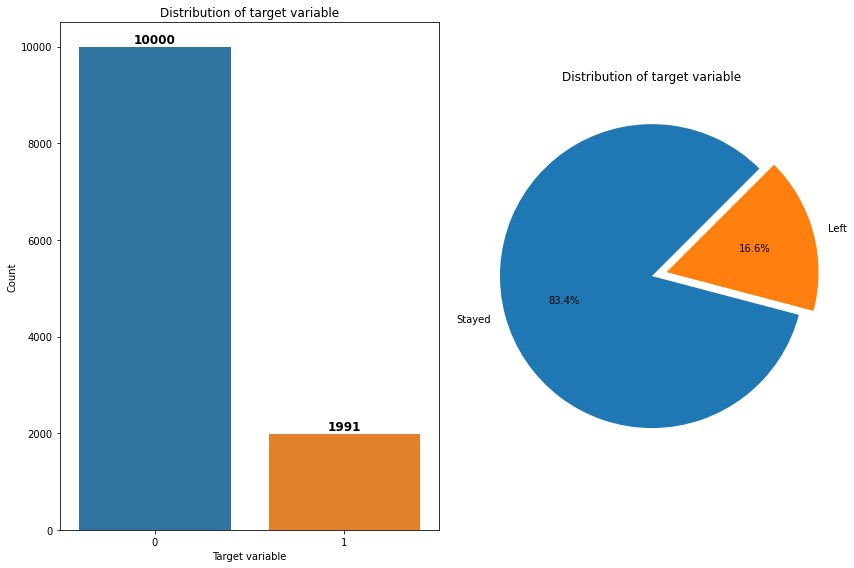

In [ ]:
plt.subplot(1,2,1)
ax = sns.countplot(x='left', data=df)
plt.title('Distribution of target variable')
plt.xlabel('Target variable')
plt.ylabel('Count')
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.subplot(1,2,2)
plt.pie(x=df["left"].value_counts(), labels = ["Stayed", "Left"], autopct = '%1.1f%%', startangle = 45, explode = (0, 0.1))
plt.title('Distribution of target variable')
plt.tight_layout()
plt.show()

In [ ]:
df2 = df.copy()

In [ ]:
df2["salary"]=df2["salary"].map({"low":0, "medium":1, "high":2})
# Ortalama bir değer görmek için maaş durumu numeric hale getirildi.

In [ ]:
df2.groupby("left").mean().T.style.background_gradient(axis=1)

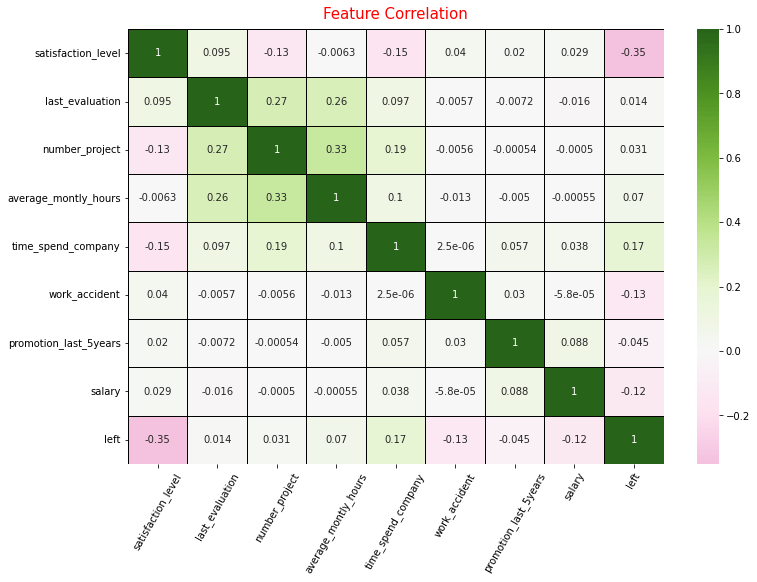

In [ ]:
sns.heatmap (df2.corr(), annot = True, linewidths=1, linecolor="black", cmap="PiYG", center=0)
plt.title("Feature Correlation", fontsize=15, color="red", pad=10)
plt.xticks(rotation = 60);

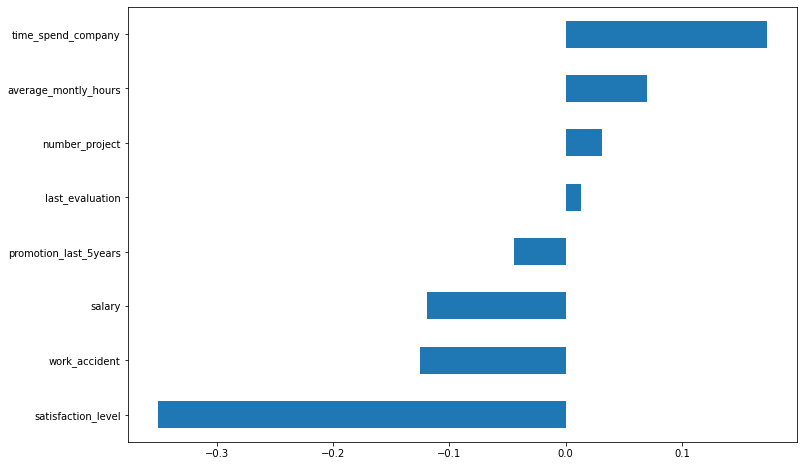

In [ ]:
df2.corr()['left'].sort_values().drop('left').plot(kind = 'barh')


In [ ]:
df2.describe().T

count        mean        std    min     25%     50%  \
satisfaction_level     11991.0    0.629658   0.241070   0.09    0.48    0.66   
last_evaluation        11991.0    0.716683   0.168343   0.36    0.57    0.72   
number_project         11991.0    3.802852   1.163238   2.00    3.00    4.00   
average_montly_hours   11991.0  200.473522  48.727813  96.00  157.00  200.00   
time_spend_company     11991.0    3.364857   1.330240   2.00    3.00    3.00   
work_accident          11991.0    0.154282   0.361234   0.00    0.00    0.00   
promotion_last_5years  11991.0    0.016929   0.129012   0.00    0.00    0.00   
salary                 11991.0    0.603870   0.635900   0.00    0.00    1.00   
left                   11991.0    0.166041   0.372133   0.00    0.00    0.00   

                          75%    max  
satisfaction_level       0.82    1.0  
last_evaluation          0.86    1.0  
number_project           5.00    7.0  
average_montly_hours   243.00  310.0  
time_spend_company       4.00   10.0  
work_accident            0.00    1.0  
promotion_last_5years    0.00    1.0  
salary                   1.00    2.0  
left                     0.00    1.0


### <font color="green"> Departmana göre işten ayrılma oranları: </font>


In [ ]:
rate_by_depart = df.groupby("departments")[["left"]].value_counts(normalize=True)*100
rate_by_depart

departments  left
IT           0       83.811475
             1       16.188525
RandD        0       87.752161
             1       12.247839
accounting   0       82.447665
             1       17.552335
hr           0       81.198003
             1       18.801997
management   0       88.073394
             1       11.926606
marketing    0       83.358098
             1       16.641902
product_mng  0       83.965015
             1       16.034985
sales        0       83.019450
             1       16.980550
support      0       82.866557
             1       17.133443
technical    0       82.620321
             1       17.379679
dtype: float64

In [ ]:
viz_rate=rate_by_depart.reset_index()

In [ ]:
sort_viz = viz_rate[viz_rate["left"] == 1].sort_values(by=0,ascending=False)["departments"]

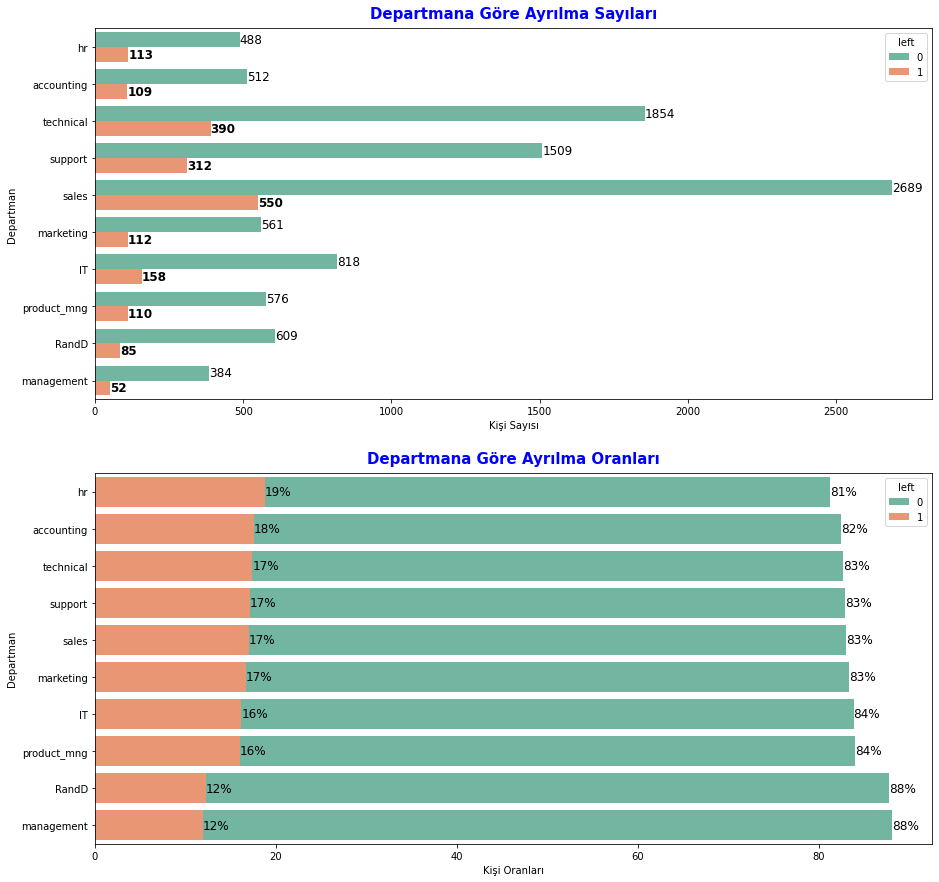

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.subplot(2,1,1)
ax = sns.countplot(y='departments', data=df, hue= "left", palette='Set2', order=sort_viz)
plt.title('Departmana Göre Ayrılma Sayıları', fontsize=15, fontweight='bold', color="blue", pad=10)
plt.ylabel('Departman')
plt.xlabel('Kişi Sayısı')
ax.bar_label(ax.containers[0], fontsize=12, color='black')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(2,1,2)
ax = sns.barplot(data=viz_rate, y="departments", x=0,hue="left",dodge=False,order=sort_viz, palette="Set2")
for i in ax.containers:
    ax.bar_label(container=i, fontsize=12, color="black",fmt="%.0f%%")
plt.title('Departmana Göre Ayrılma Oranları', fontsize=15,fontweight='bold', color="blue", pad=10)
plt.ylabel('Departman')
plt.xlabel('Kişi Oranları');




### <font color="green"> Maaşa göre ayrılma oranları </font>


In [ ]:
rate_by_salary = df.groupby("salary")[["left"]].value_counts(normalize=True)*100
rate_by_salary

salary  left
high    0       95.151515
        1        4.848485
low     0       79.547038
        1       20.452962
medium  0       85.383007
        1       14.616993
dtype: float64

In [ ]:
viz_rate2=rate_by_salary.reset_index()

In [ ]:
sort_viz2 = viz_rate2[viz_rate2["left"] == 1].sort_values(by=0,ascending=False)["salary"]

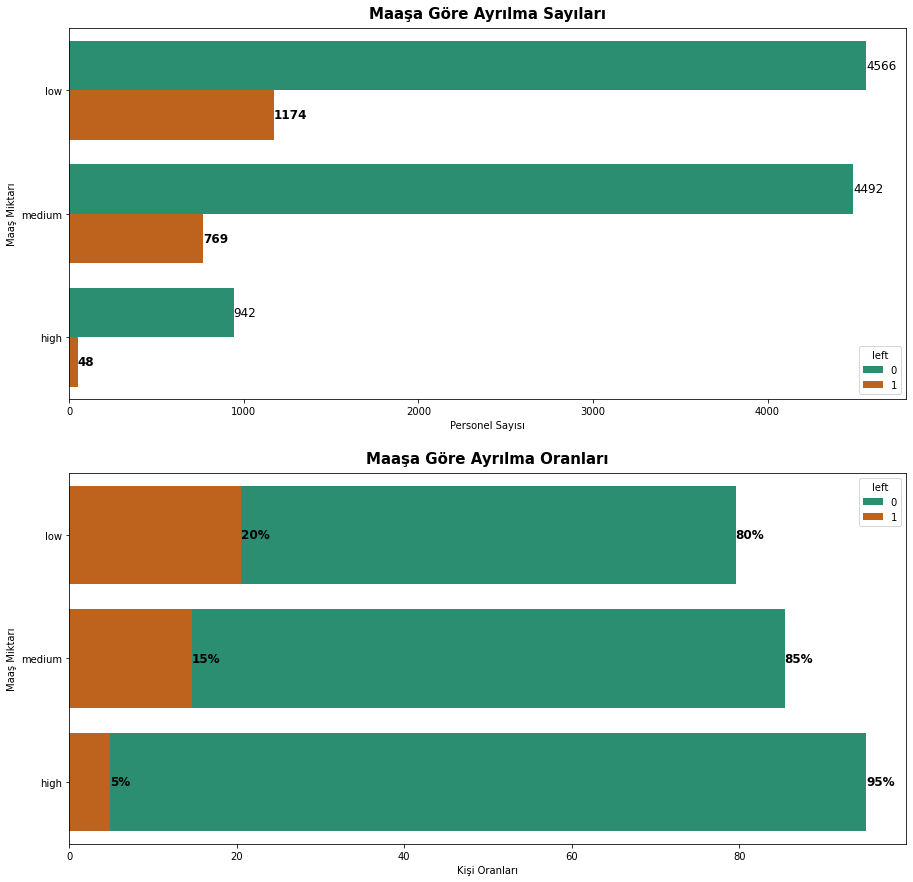

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.subplot(2,1,1)
ax = sns.countplot(y='salary', data=df, hue= "left", palette='Dark2', order=sort_viz2)
plt.title('Maaşa Göre Ayrılma Sayıları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Maaş Miktarı')
plt.xlabel('Personel Sayısı')
ax.bar_label(ax.containers[0], fontsize=12, color='black')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(2,1,2)
ax = sns.barplot(data=viz_rate2, y="salary", x=0,hue="left",dodge=False,order=sort_viz2, palette="Dark2")
for i in ax.containers:
    ax.bar_label(container=i, fontsize=12, color="black",fmt="%.0f%%", fontweight='bold')
plt.title('Maaşa Göre Ayrılma Oranları', fontsize=15,fontweight='bold', color="black", pad=10)
plt.ylabel('Maaş Miktarı')
plt.xlabel('Kişi Oranları');

### <font color="green"> iş kazasına göre ayrılma oranı </font>



In [ ]:
df["work_accident"].value_counts()

0    10141
1     1850
Name: work_accident, dtype: int64

In [ ]:
rate_by_accident = df.groupby("work_accident")[["left"]].value_counts(normalize=True)*100
rate_by_accident

work_accident  left
0              0       81.402229
               1       18.597771
1              0       94.324324
               1        5.675676
dtype: float64

In [ ]:
# Kaza geçirip ayrılmayan oranı daha yüksek. 

In [ ]:
viz_rate3=rate_by_accident.reset_index()

In [ ]:
sort_viz3 = viz_rate3[viz_rate3["left"] == 1].sort_values(by=0,ascending=False)["work_accident"]

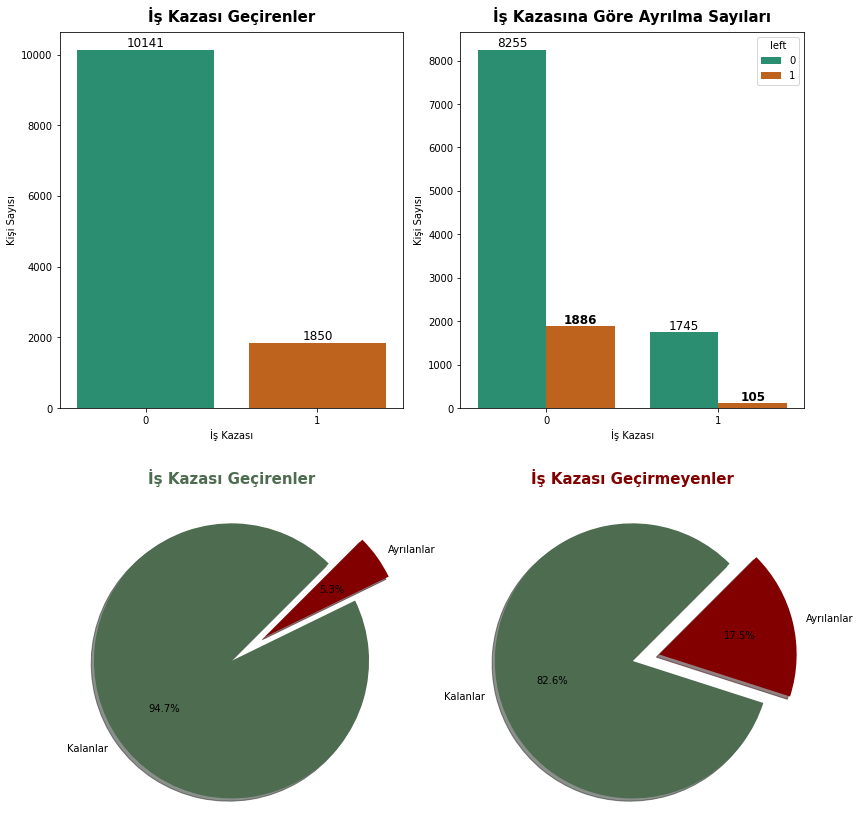

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

plt.subplot(2,2,1)
ax = sns.countplot(x='work_accident', data=df, palette='Dark2')
plt.title('İş Kazası Geçirenler', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Sayısı')
plt.xlabel('İş Kazası')
ax.bar_label(ax.containers[0], fontsize=12, color='black')

plt.subplot(2,2,2)
ax = sns.countplot(x='work_accident', data=df, hue= "left", palette='Dark2', order=sort_viz3)
plt.title('İş Kazasına Göre Ayrılma Sayıları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Sayısı')
plt.xlabel('İş Kazası')
ax.bar_label(ax.containers[0], fontsize=12, color='black')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(2,2,3)
plt.title("İş Kazası Geçirenler", c="#4E6C50", size=15,fontweight='bold')
plt.pie(df[df.left == 1].work_accident.value_counts(), labels = ["Kalanlar", "Ayrılanlar"],
        autopct = '%1.1f%%', startangle = 45, explode=[0,0.3],
        shadow=True, colors=['#4E6C50', '#820000'])
plt.subplot(2,2,4)
plt.title("İş Kazası Geçirmeyenler", c="#820000", size=15,fontweight='bold')
plt.pie(df[df.left == 0].work_accident.value_counts(), labels = ["Kalanlar", "Ayrılanlar"], 
        autopct = '%1.1f%%', startangle = 45, explode=[0,0.2], shadow=True,
        colors=['#4E6C50', '#820000'])
plt.tight_layout()
plt.show()



### <font color="green"> Terfiye göre ayrılma oranları
 </font>



In [ ]:
rate_by_promotion = df.groupby("promotion_last_5years")[["left"]].value_counts(normalize=True)*100
rate_by_promotion

promotion_last_5years  left
0                      0       83.177808
                       1       16.822192
1                      0       96.059113
                       1        3.940887
dtype: float64

In [ ]:
viz_rate4=rate_by_promotion.reset_index()

In [ ]:
sort_viz4 = viz_rate4[viz_rate4["left"] == 1].sort_values(by=0,ascending=False)["promotion_last_5years"]

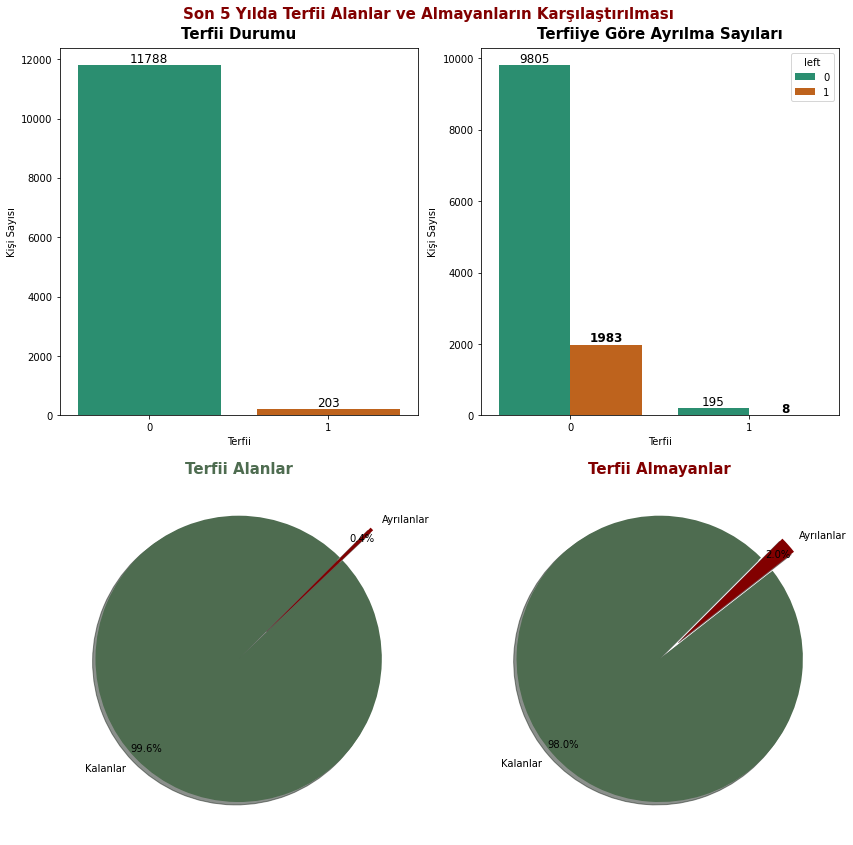

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
plt.suptitle("Son 5 Yılda Terfii Alanlar ve Almayanların Karşılaştırılması",
             fontsize=15, fontweight='bold', color="#820000")

plt.subplot(2,2,1)
ax = sns.countplot(x='promotion_last_5years', data=df, palette='Dark2')
plt.title('Terfii Durumu', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Sayısı')
plt.xlabel('Terfii')
ax.bar_label(ax.containers[0], fontsize=12, color='black')

plt.subplot(2,2,2)
ax = sns.countplot(x='promotion_last_5years', data=df, hue= "left", palette='Dark2')
plt.title('Terfiiye Göre Ayrılma Sayıları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Sayısı')
plt.xlabel('Terfii')
ax.bar_label(ax.containers[0], fontsize=12, color='black')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(2,2,3)
plt.title("Terfii Alanlar", c="#4E6C50", size=15,fontweight='bold')
plt.pie(df[df.left == 1].promotion_last_5years.value_counts(), labels = ["Kalanlar", "Ayrılanlar"],
        autopct = '%1.1f%%', startangle = 45, explode=[0,0.3],
        shadow=True, colors=['#4E6C50', '#820000'],pctdistance=0.9)
plt.subplot(2,2,4)
plt.title("Terfii Almayanlar", c="#820000", size=15,fontweight='bold')
plt.pie(df[df.left == 0].promotion_last_5years.value_counts(), labels = ["Kalanlar", "Ayrılanlar"], 
        autopct = '%1.1f%%', startangle = 45, explode=[0,0.2],
        shadow=True, colors=['#4E6C50', '#820000'],pctdistance=0.9)
plt.tight_layout()
plt.show()



### <font color="green"> Memnuniyet Oranı Personel </font>



In [ ]:
df["satisfaction_rate"] = df["satisfaction_level"].apply(lambda x: "Low" if x <0.26 else "Medium" if x < 0.51 else "High" if x<0.76 else "Very-High" )

In [ ]:
rate_by_satisfaction = df.groupby("satisfaction_rate")[["left"]].value_counts(normalize=True)*100
rate_by_satisfaction

satisfaction_rate  left
High               0       96.532594
                   1        3.467406
Low                0       57.949126
                   1       42.050874
Medium             0       58.372531
                   1       41.627469
Very-High          0       90.025695
                   1        9.974305
dtype: float64

In [ ]:
viz_rate5=rate_by_satisfaction.reset_index()

In [ ]:
sort_viz5 = viz_rate5[viz_rate5["left"] == 1].sort_values(by=0,ascending=False)["satisfaction_rate"]

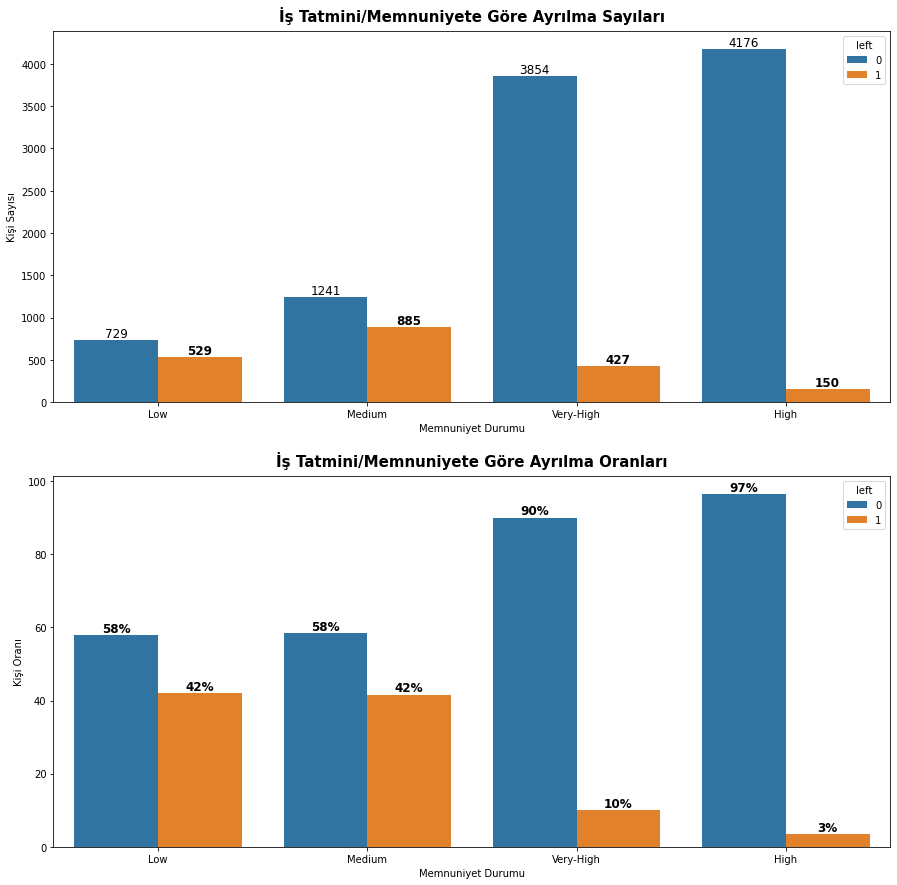

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.subplot(2,1,1)
ax = sns.countplot(x='satisfaction_rate', data=df, hue= "left", order=sort_viz5)
plt.title('İş Tatmini/Memnuniyete Göre Ayrılma Sayıları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Sayısı')
plt.xlabel('Memnuniyet Durumu')
ax.bar_label(ax.containers[0], fontsize=12, color='black')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(2,1,2)
ax = sns.barplot(data=viz_rate5, x="satisfaction_rate", y=0,hue="left",dodge=True,order=sort_viz5)
for i in ax.containers:
    ax.bar_label(container=i, fontsize=12, color="black",fmt="%.0f%%", fontweight='bold')
plt.title('İş Tatmini/Memnuniyete Göre Ayrılma Oranları', fontsize=15,fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Oranı')
plt.xlabel('Memnuniyet Durumu');

### <font color="green"> Memnuniyet Oranı İş veren </font>



In [ ]:
df["last_evaluation"].value_counts().sort_index().head()
# %36 altında işveren memnuniyeti düşmüyor. Belli bir oran altında olanlar işveren tarafından da çıkarılmış olaiblri.

0.36    19
0.37    46
0.38    42
0.39    45
0.40    49
Name: last_evaluation, dtype: int64

In [ ]:
df["evaluation_rate"] = df["last_evaluation"].apply(lambda x: "Low" if x <0.51 else "Medium" if x < 0.66 else "High" if x<0.86 else "Very-High" )
# Oranları daha net görmek için <50-65-85-100 aralığında etiketledik

In [ ]:
df.groupby("evaluation_rate")[["left"]].value_counts()

evaluation_rate  left
High             0       3644
                 1        342
Low              0       1032
                 1        398
Medium           0       2869
                 1        499
Very-High        0       2455
                 1        752
dtype: int64

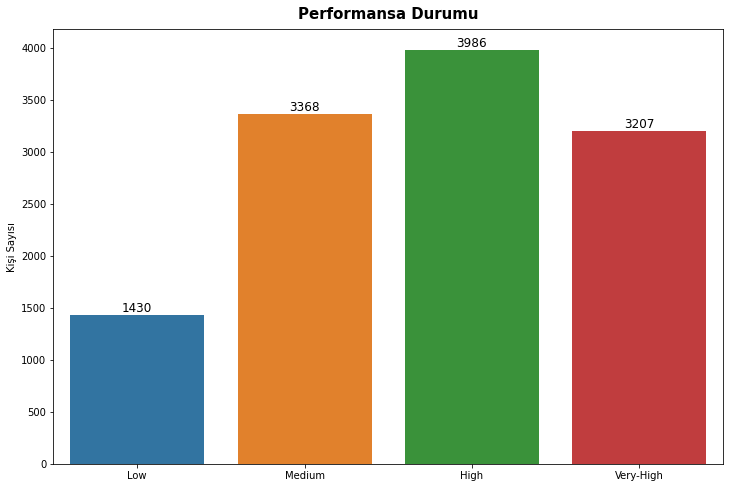

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='evaluation_rate', data=df, order=["Low", "Medium", "High", "Very-High"])
plt.title('Performansa Durumu', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Sayısı')
plt.xlabel('')
ax.bar_label(ax.containers[0], fontsize=12, color='black');

In [ ]:
rate_by_evaluation = df.groupby("evaluation_rate")[["left"]].value_counts(normalize=True)*100
rate_by_evaluation

evaluation_rate  left
High             0       91.419970
                 1        8.580030
Low              0       72.167832
                 1       27.832168
Medium           0       85.184086
                 1       14.815914
Very-High        0       76.551294
                 1       23.448706
dtype: float64

In [ ]:
viz_rate6=rate_by_evaluation.reset_index()

In [ ]:
sort_viz6 = viz_rate6[viz_rate6["left"] == 1].sort_values(by=0,ascending=False)["evaluation_rate"]

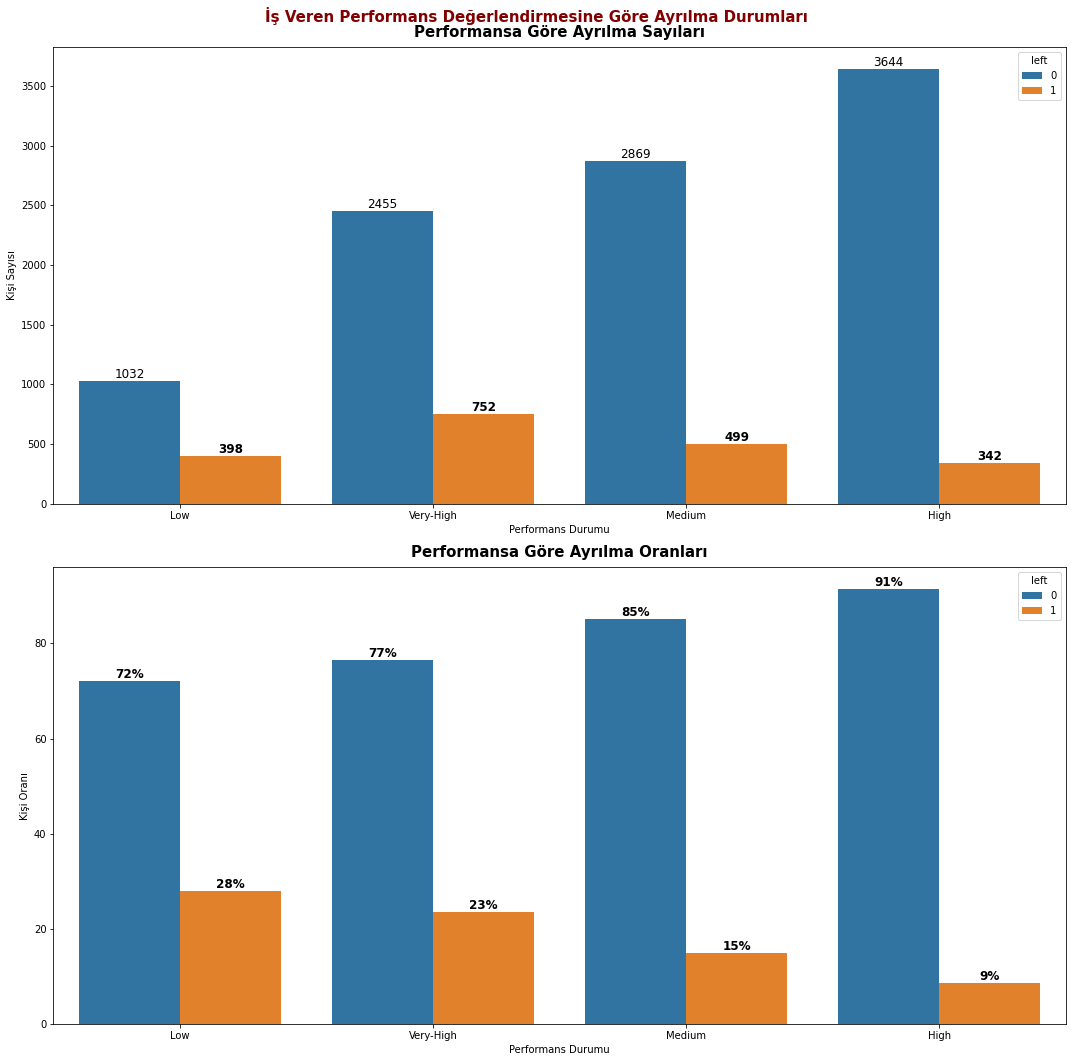

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.suptitle("İş Veren Performans Değerlendirmesine Göre Ayrılma Durumları",
             fontsize=15, fontweight='bold', color="#820000")
plt.subplot(2,1,1)
ax = sns.countplot(x='evaluation_rate', data=df, hue= "left", order=sort_viz6)
plt.title('Performansa Göre Ayrılma Sayıları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Sayısı')
plt.xlabel('Performans Durumu')
ax.bar_label(ax.containers[0], fontsize=12, color='black')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(2,1,2)
ax = sns.barplot(data=viz_rate6, x="evaluation_rate", y=0,hue="left",dodge=True,order=sort_viz6)
for i in ax.containers:
    ax.bar_label(container=i, fontsize=12, color="black",fmt="%.0f%%", fontweight='bold')
plt.title('Performansa Göre Ayrılma Oranları', fontsize=15,fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Oranı')
plt.xlabel('Performans Durumu')
plt.tight_layout();

In [ ]:
# Patronun % 85 oranı üstünde memnun olup işten ayrılan oranı düşük olmasını beklerdik. 
# Fakat memnun kalınan personeller kaybedilmiş. 

### <font color="green"> İşveren Memnuniyet ve Personel Memnuniyet karşılaştırması </font>



In [ ]:
evaluation_by_satisfaction = df.groupby("evaluation_rate")[["satisfaction_rate"]].value_counts(normalize=True)*100
evaluation_by_satisfaction

evaluation_rate  satisfaction_rate
High             High                 39.713999
                 Very-High            38.258906
                 Low                  11.916708
                 Medium               10.110386
Low              Medium               46.503497
                 High                 27.412587
                 Very-High            19.720280
                 Low                   6.363636
Medium           High                 35.866983
                 Very-High            33.551069
                 Medium               24.317102
                 Low                   6.264846
Very-High        Very-High            41.908326
                 High                 35.640786
                 Low                  14.998441
                 Medium                7.452448
dtype: float64

In [ ]:
viz_rate7=evaluation_by_satisfaction.reset_index()

In [ ]:
sort_viz7 = viz_rate7[viz_rate7["satisfaction_rate"] == "Very-High"].sort_values(by=0,ascending=False)["evaluation_rate"]

In [ ]:
sort_viz7

12    Very-High
1          High
9        Medium
6           Low
Name: evaluation_rate, dtype: object

In [ ]:
viz_rate7[viz_rate7["satisfaction_rate"] == 1].sort_values(by=0,ascending=False)["evaluation_rate"]

Series([], Name: evaluation_rate, dtype: object)

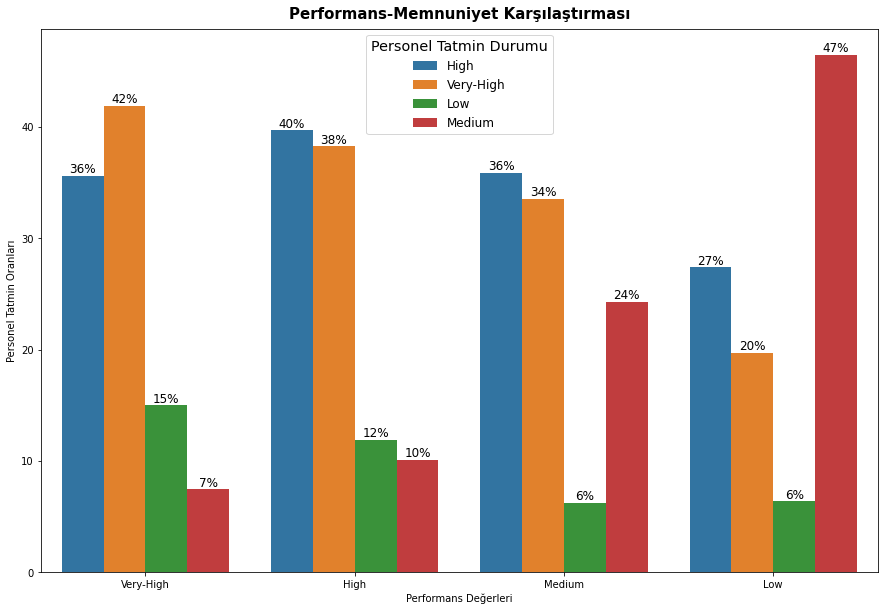

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=viz_rate7, x="evaluation_rate", y=0,hue="satisfaction_rate",dodge=True,order=sort_viz7)
plt.title('Performans-Memnuniyet Karşılaştırması', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Personel Tatmin Oranları')
plt.xlabel('Performans Değerleri')
ax.legend(title="Personel Tatmin Durumu", title_fontsize="x-large",fontsize="large")
for i in ax.containers:
    ax.bar_label(container=i, size=12, color="black",fmt="%.0f%%"); 

In [ ]:
# Patron memnun fakat personelin memnun olmama oranı yüksek. 
# Performans gösteren Personel memnun edilmiyor gibi görünüyor.
# Memnuniyet oranlarının dengeli olmasını beklerdik fakat personel memnuniyetsilği bir hayli yüksek

### <font color="green"> Deneyime göre ayrılma oranları </font>



In [ ]:
rate_by_time_spend = df.groupby("time_spend_company")[["left"]].value_counts(normalize=True)*100
rate_by_time_spend

time_spend_company  left
2                   0        98.934708
                    1         1.065292
3                   0        83.159923
                    1        16.840077
4                   0        75.311721
                    1        24.688279
5                   0        54.613936
                    1        45.386064
6                   0        79.889299
                    1        20.110701
7                   0       100.000000
8                   0       100.000000
10                  0       100.000000
dtype: float64

In [ ]:
df["time_spend_company"].value_counts()

3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: time_spend_company, dtype: int64

In [ ]:
viz_rate8=rate_by_time_spend.reset_index()

In [ ]:
sort_viz8 = viz_rate8[viz_rate8["left"] == 1].sort_values(by=0,ascending=False)["time_spend_company"]

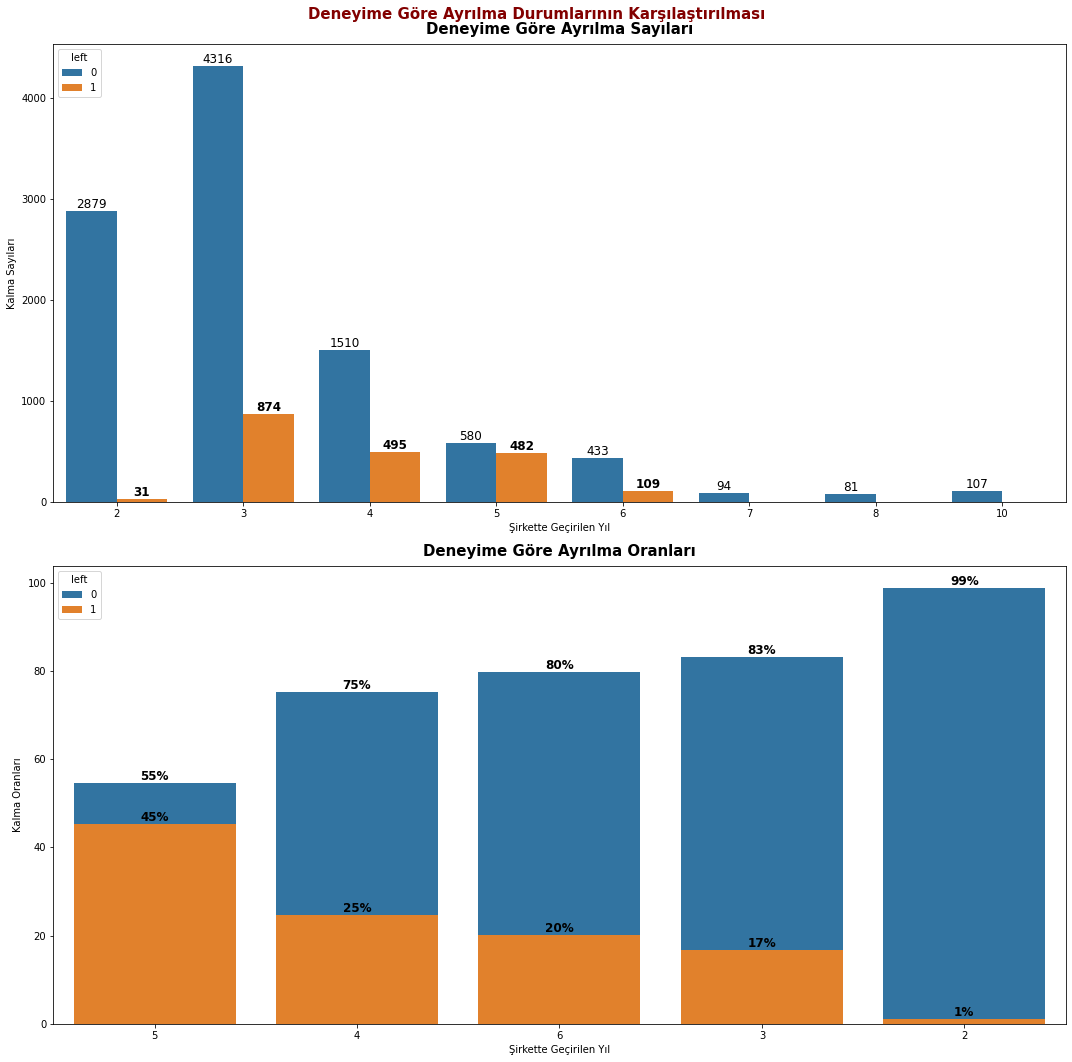

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.suptitle("Deneyime Göre Ayrılma Durumlarının Karşılaştırılması",
             fontsize=15, fontweight='bold', color="#820000")
plt.subplot(2,1,1)
ax = sns.countplot(x='time_spend_company', data=df, hue= "left")
plt.title('Deneyime Göre Ayrılma Sayıları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.xlabel('Şirkette Geçirilen Yıl')
plt.ylabel('Kalma Sayıları')
ax.bar_label(ax.containers[0], fontsize=12, color='black')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(2,1,2)
ax = sns.barplot(data=viz_rate8, x="time_spend_company", y=0,hue="left",dodge=False,order=sort_viz8)
for i in ax.containers:
    ax.bar_label(container=i, fontsize=12, color="black",fmt="%.0f%%", fontweight='bold')
plt.title('Deneyime Göre Ayrılma Oranları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.xlabel('Şirkette Geçirilen Yıl')
plt.ylabel('Kalma Oranları')
plt.tight_layout();

In [ ]:
# 4.ve 5.yılda ayrılma oranı aşırı yüksek. 6. yıldan sonra ayrılmadıysa bir daha da ayrılmıyor.
# Çalışma sözleşmesi, terfii, maaş, iş yükü

In [ ]:
# yıla ve departmna göre bakılabilir

### <font color="green"> Çalışma Saatlerine göre ayrılma oranları </font>



In [ ]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      0       sales   
2                   4              0                      0       sales   
3                   5              0                      0       sales   
4                   3              0                      0       sales   

   salary  left  satisfaction_rate  evaluation_rate  
0     low     1               0.50             0.65  
1  medium     1               1.00             1.00  
2  medium     1               0.25             1.00  
3     low     1               0.75             1.00  
4     low     1               0.50             0.65

In [ ]:
df["average_montly_hours"].describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [ ]:
df["rate_average_hours"] = df["average_montly_hours"].apply(lambda x: "Düşük" if x < 157 else "Orta" if x < 200 else "Yüksek" if x <243 else "Çok-Yüksek" )


In [ ]:
rate_by_hours = df.groupby("rate_average_hours")[["left"]].value_counts(normalize=True)*100
rate_by_hours

rate_average_hours  left
Düşük               0       73.667927
                    1       26.332073
Orta                0       95.329225
                    1        4.670775
Yüksek              0       92.111527
                    1        7.888473
Çok-Yüksek          0       72.236756
                    1       27.763244
dtype: float64

In [ ]:
viz_rate9=rate_by_hours.reset_index()

In [ ]:
sort_viz9 = viz_rate9[viz_rate9["left"] == 1].sort_values(by=0,ascending=False)["rate_average_hours"]

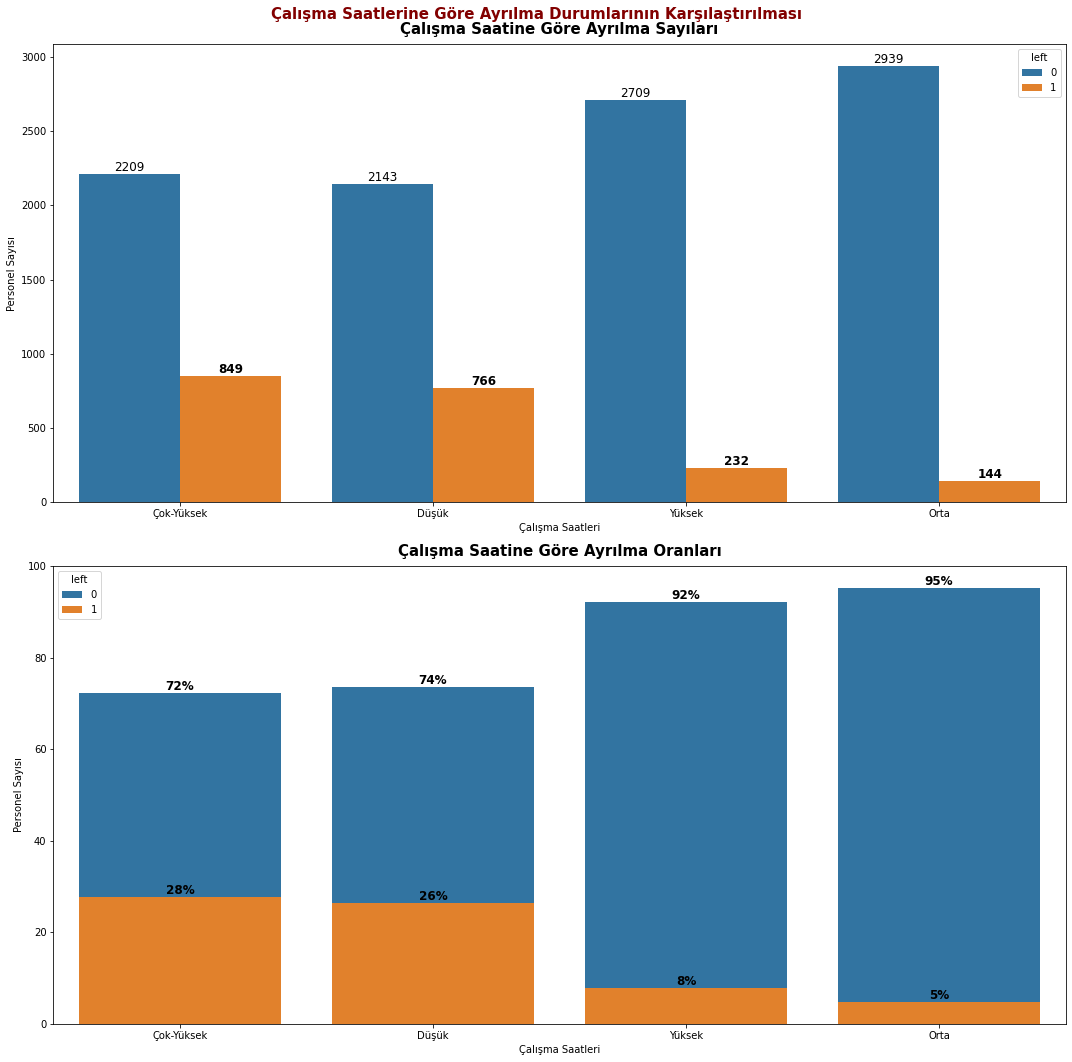

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.suptitle("Çalışma Saatlerine Göre Ayrılma Durumlarının Karşılaştırılması",
             fontsize=15, fontweight='bold', color="#820000")
plt.subplot(2,1,1)
ax = sns.countplot(x='rate_average_hours', data=df, hue= "left",order=sort_viz9)
plt.title('Çalışma Saatine Göre Ayrılma Sayıları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Personel Sayısı')
plt.xlabel('Çalışma Saatleri')
ax.bar_label(ax.containers[0], fontsize=12, color='black')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(2,1,2)
ax = sns.barplot(data=viz_rate9, x="rate_average_hours", y=0,hue="left",dodge=False,order=sort_viz9)
for i in ax.containers:
    ax.bar_label(container=i, fontsize=12, color="black",fmt="%.0f%%", fontweight='bold')
plt.title('Çalışma Saatine Göre Ayrılma Oranları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Personel Sayısı')
plt.xlabel('Çalışma Saatleri')
plt.tight_layout();

In [ ]:
# Çalışma saati çok olanlarda ayrılma oranı yüksek olması beklenirken çalışma saati düşük olanlarda da bu oran yüksek
# Aylık 150 saat aralığında çalışanların detayına inmek gerekir.

In [ ]:
df.groupby(["rate_average_hours"])[["salary"]].value_counts(normalize=True)*100

rate_average_hours  salary
Az                  low       48.882778
                    medium    43.829495
                    high       7.287728
Orta                low       47.810574
                    medium    43.139799
                    high       9.049627
Yüksek              low       46.378783
                    medium    44.712683
                    high       8.908535
Çok-Yüksek          low       48.397646
                    medium    43.852191
                    high       7.750164
dtype: float64

In [ ]:
rate_hours_salary = df.groupby(["rate_average_hours","left"])[["salary"]].value_counts(normalize=True)*100
rate_hours_salary

rate_average_hours  left  salary
Düşük               0     medium    45.916939
                          low       45.170322
                          high       8.912739
                    1     low       59.268930
                          medium    37.989556
                          high       2.741514
Orta                0     low       46.988772
                          medium    43.654304
                          high       9.356924
                    1     low       64.583333
                          medium    32.638889
                          high       2.777778
Yüksek              0     low       45.293466
                          medium    45.182724
                          high       9.523810
                    1     low       59.051724
                          medium    39.224138
                          high       1.724138
Çok-Yüksek          0     medium    45.314622
                          low       44.816659
                          high       9.868719
 

In [ ]:
viz_rate10=rate_hours_salary.reset_index()

In [ ]:
sort_viz10 = viz_rate10[viz_rate10["left"] == 1].sort_values(by=0,ascending=False)["rate_average_hours"]

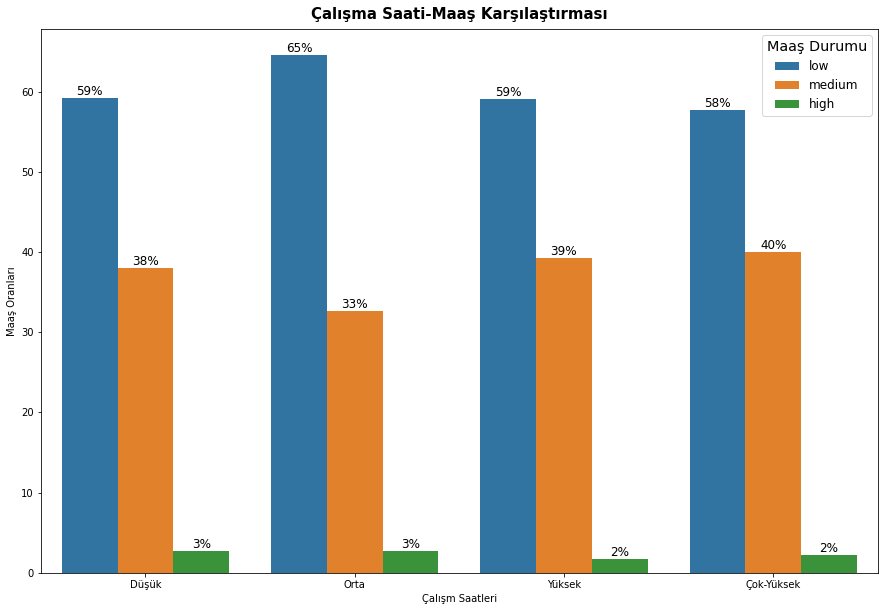

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(data=viz_rate10[viz_rate10["left"]==1], x="rate_average_hours", y=0,hue="salary",dodge=True)
plt.title('Çalışma Saati-Maaş Karşılaştırması', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Maaş Oranları')
plt.xlabel('Çalışm Saatleri')
ax.legend(title="Maaş Durumu", title_fontsize="x-large",fontsize="large")
for i in ax.containers:
    ax.bar_label(container=i, size=12, color="black",fmt="%.0f%%"); 

In [ ]:
# Çalışma saati düşük olanın maaşı da düşüktür. Ayrılma sebebi çalışma saatinden ziyade maaş kanaklı olup olmadığına
# baktığımızda maaşın etkisinden farklı bir etki olduğu anlaşılmakta. 

In [ ]:
# df.corr()["rate_average_hours"].sort_values(ascending=False)
# diğer featurelar ile corelasyona baktığımızda birbirleri ile doğru orantılı olanlar dışında
# farklı bir insight elde edemedik. Çalışma süresinin düşük olması kendisi diğer featurlar ile ilişkisiz.

### <font color="green"> İş Yükü/Projeye göre ayrılma oranları </font>


In [ ]:
df.groupby(["number_project"])[["left"]].value_counts(normalize=True)*100

number_project  left
2               1        54.171934
                0        45.828066
3               0        98.920455
                1         1.079545
4               0        93.568521
                1         6.431479
5               0        84.639498
                1        15.360502
6               0        55.084746
                1        44.915254
7               1       100.000000
dtype: float64

In [ ]:
rate_by_project = df.groupby("number_project")[["left"]].value_counts(normalize=True)*100
rate_by_project

number_project  left
2               1        54.171934
                0        45.828066
3               0        98.920455
                1         1.079545
4               0        93.568521
                1         6.431479
5               0        84.639498
                1        15.360502
6               0        55.084746
                1        44.915254
7               1       100.000000
dtype: float64

In [ ]:
viz_rate12=rate_by_project.reset_index()

In [ ]:
sort_viz12 = viz_rate12[viz_rate12["left"] == 1].sort_values(by=0,ascending=False)["number_project"]

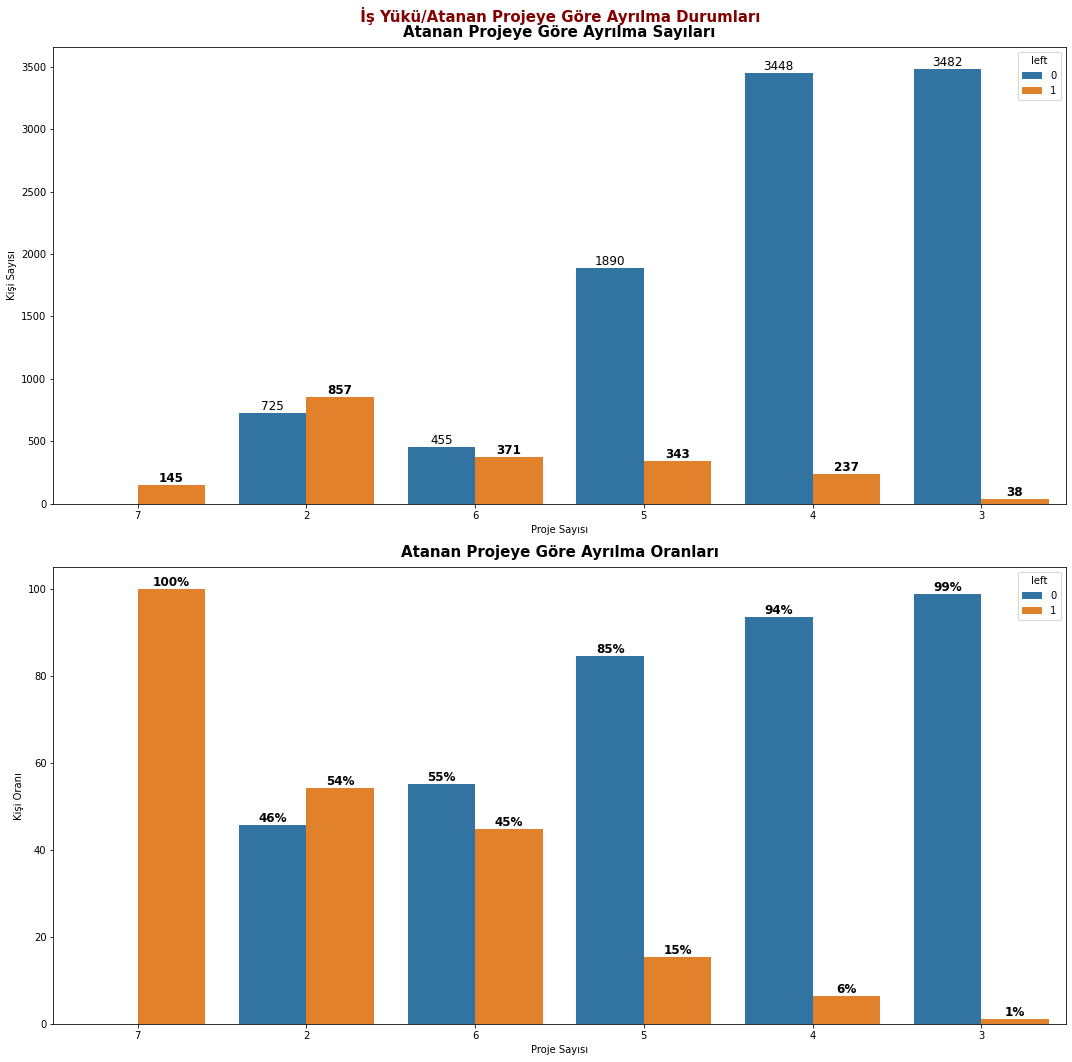

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
plt.suptitle("         İş Yükü/Atanan Projeye Göre Ayrılma Durumları",
             fontsize=15, fontweight='bold', color="#820000")
plt.subplot(2,1,1)
ax = sns.countplot(x='number_project', data=df, hue= "left", order=sort_viz12)
plt.title('Atanan Projeye Göre Ayrılma Sayıları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Sayısı')
plt.xlabel('Proje Sayısı')
ax.bar_label(ax.containers[0], fontsize=12, color='black')
ax.bar_label(ax.containers[1], fontsize=12, color='black', fontweight='bold')

plt.subplot(2,1,2)
ax = sns.barplot(data=viz_rate12, x="number_project", y=0,hue="left",dodge=True,order=sort_viz12)
for i in ax.containers:
    ax.bar_label(container=i, fontsize=12, color="black",fmt="%.0f%%", fontweight='bold')
plt.title('Atanan Projeye Göre Ayrılma Oranları', fontsize=15,fontweight='bold', color="black", pad=10)
plt.ylabel('Kişi Oranı')
plt.xlabel('Proje Sayısı')
plt.tight_layout();

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [ ]:
df = pd.read_csv("HR_Dataset.csv")

df.columns = df.columns.str.lower().str.strip()
left = df["left"]
df.drop("left", axis=1,inplace=True)
df["left"] = left
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      0       sales   
2                   4              0                      0       sales   
3                   5              0                      0       sales   
4                   3              0                      0       sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [ ]:
X = df.drop(["left","departments"], axis=1)


In [ ]:
cat_columns = X.select_dtypes("object").columns
num_columns = X.select_dtypes("number").columns
cat_columns,num_columns

(Index(['salary'], dtype='object'),
 Index(['satisfaction_level', 'last_evaluation', 'number_project',
        'average_montly_hours', 'time_spend_company', 'work_accident',
        'promotion_last_5years'],
       dtype='object'))

In [ ]:
ord_enc = OrdinalEncoder(categories=[["low","medium","high"]])
scaler = MinMaxScaler()

In [ ]:
column_trans = make_column_transformer((ord_enc, cat_columns), (scaler, num_columns),
                                         remainder="passthrough")

In [ ]:
X_scaled = column_trans.fit_transform(X)

In [ ]:
X_scaled = pd.DataFrame(data=X_scaled, columns=column_trans.get_feature_names_out(), index=df.index)
X_scaled.sample(7)

ordinalencoder__salary  minmaxscaler__satisfaction_level  \
83                        0.0                          0.824176   
1768                      0.0                          0.307692   
7905                      1.0                          0.494505   
6038                      1.0                          0.483516   
10672                     2.0                          0.857143   
7175                      1.0                          0.791209   
9572                      0.0                          0.549451   

       minmaxscaler__last_evaluation  minmaxscaler__number_project  \
83                          0.765625                           0.4   
1768                        0.250000                           0.0   
7905                        0.406250                           0.0   
6038                        0.406250                           0.2   
10672                       0.953125                           0.4   
7175                        0.796875                           0.4   
9572                        0.671875                           0.0   

       minmaxscaler__average_montly_hours  minmaxscaler__time_spend_company  \
83                               0.714953                             0.500   
1768                             0.210280                             0.125   
7905                             0.210280                             0.000   
6038                             0.415888                             0.125   
10672                            0.686916                             0.125   
7175                             0.303738                             0.000   
9572                             0.462617                             0.125   

       minmaxscaler__work_accident  minmaxscaler__promotion_last_5years  
83                             0.0                                  0.0  
1768                           0.0                                  0.0  
7905                           0.0                                  0.0  
6038                           0.0                                  0.0  
10672                          0.0                                  0.0  
7175                           0.0                                  0.0  
9572                           0.0                                  0.0

# Cluster Analysis

#### The Elbow Method

In [ ]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz  pyclustertend'ın hopkins kütüphanesinde var.Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız . Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [ ]:
hopkins(X_scaled, X_scaled.shape[0])

0.12485289214009901

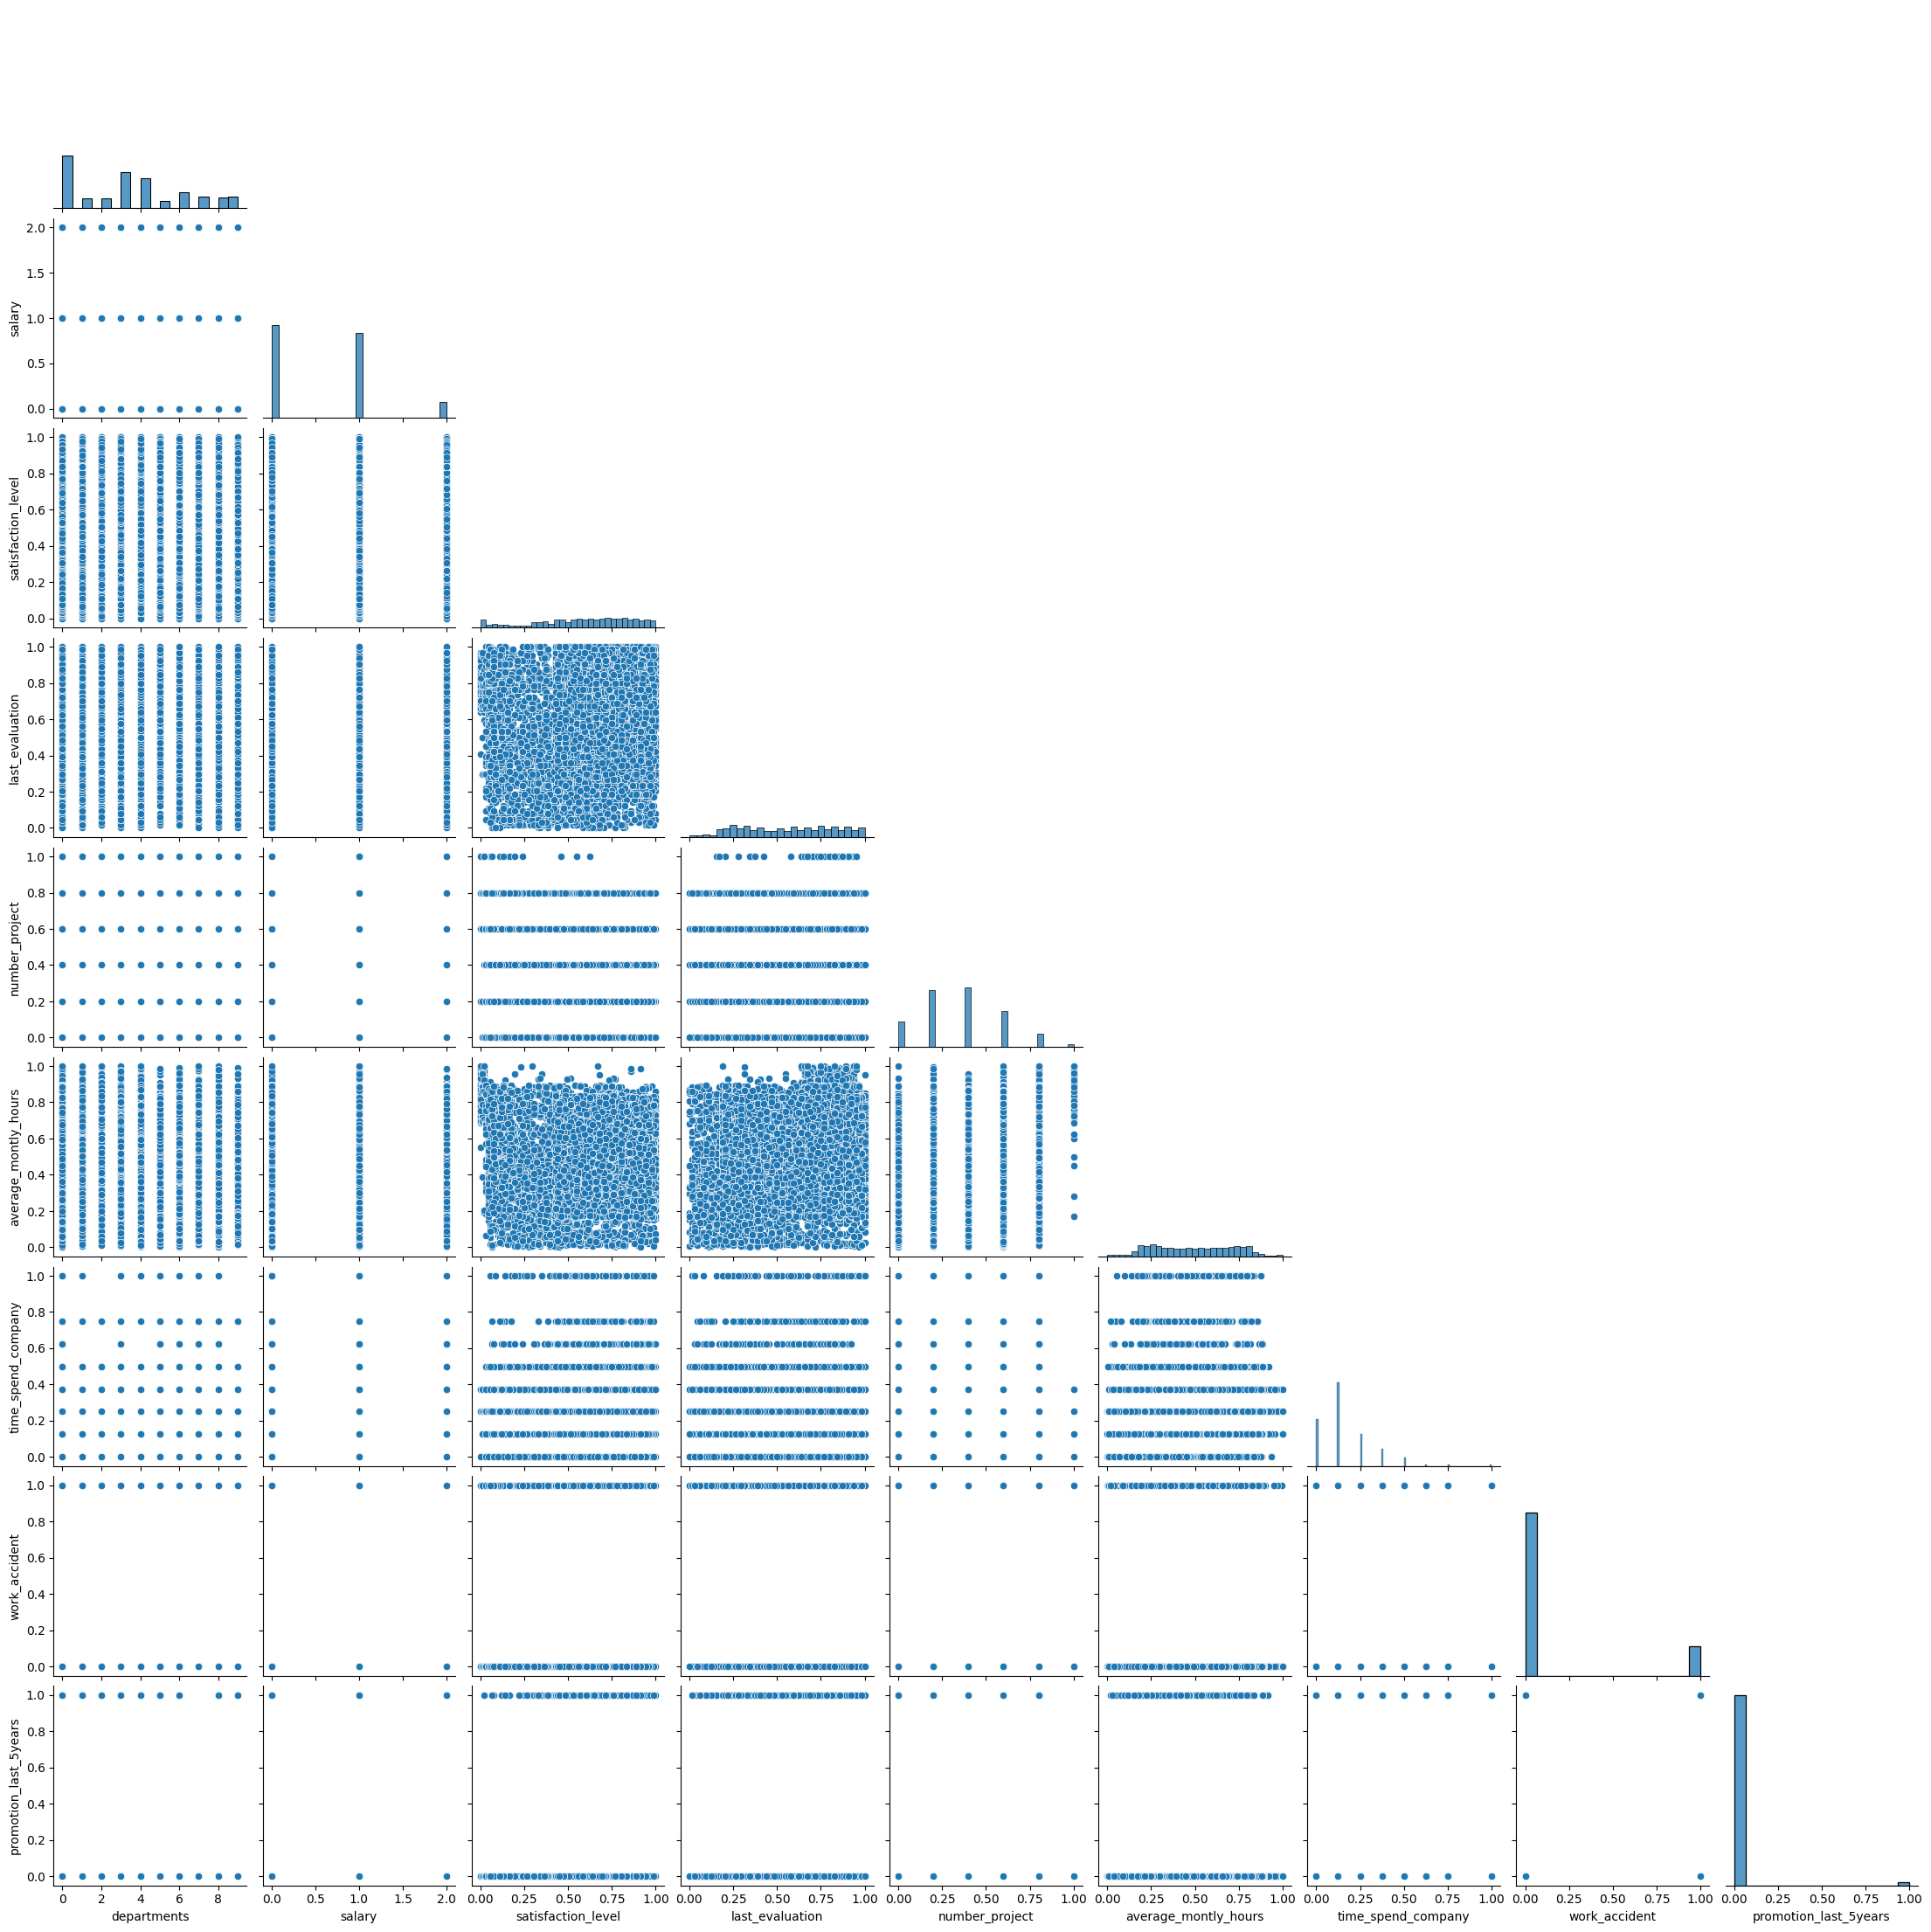

In [ ]:
sns.pairplot(X_scaled, corner=True);

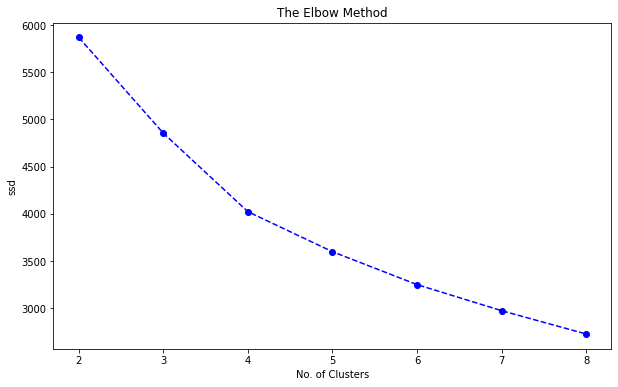

In [ ]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,9):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 9), ssd, "bo--")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [ ]:
pd.Series(ssd).diff()

0            NaN
1   -1014.495681
2    -831.177250
3    -423.988285
4    -348.247450
5    -276.569333
6    -246.746027
dtype: float64

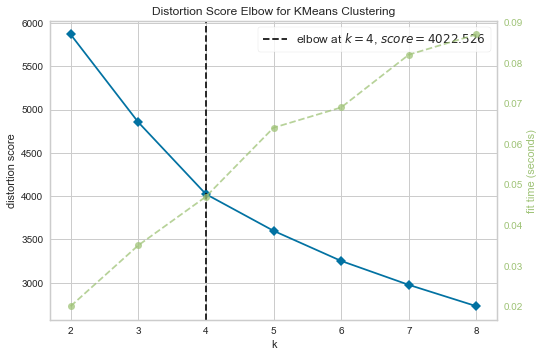

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,9))
visu.fit(X_scaled)
visu.poof();

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.37693259456102707
For n_clusters=3, the silhouette score is 0.39397537555658985
For n_clusters=4, the silhouette score is 0.39595719452153405
For n_clusters=5, the silhouette score is 0.42219492775275463
For n_clusters=6, the silhouette score is 0.3322170663509983
For n_clusters=7, the silhouette score is 0.2574127081502971
For n_clusters=8, the silhouette score is 0.2743081781044241


In [ ]:
KMeans_model = KMeans(n_clusters = 4, random_state=42)

In [ ]:
KMeans_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
X_scaled["cluster_K3"] = KMeans_model.labels_

In [ ]:
X_scaled.head()

ordinalencoder__salary  minmaxscaler__satisfaction_level  \
0                     0.0                          0.318681   
1                     1.0                          0.780220   
2                     1.0                          0.021978   
3                     0.0                          0.692308   
4                     0.0                          0.307692   

   minmaxscaler__last_evaluation  minmaxscaler__number_project  \
0                       0.265625                           0.0   
1                       0.781250                           0.6   
2                       0.812500                           1.0   
3                       0.796875                           0.6   
4                       0.250000                           0.0   

   minmaxscaler__average_montly_hours  minmaxscaler__time_spend_company  \
0                            0.285047                             0.125   
1                            0.775701                             0.500   
2                            0.822430                             0.250   
3                            0.593458                             0.375   
4                            0.294393                             0.125   

   minmaxscaler__work_accident  minmaxscaler__promotion_last_5years  \
0                          0.0                                  0.0   
1                          0.0                                  0.0   
2                          0.0                                  0.0   
3                          0.0                                  0.0   
4                          0.0                                  0.0   

   cluster_K3  
0           0  
1           3  
2           3  
3           0  
4           0

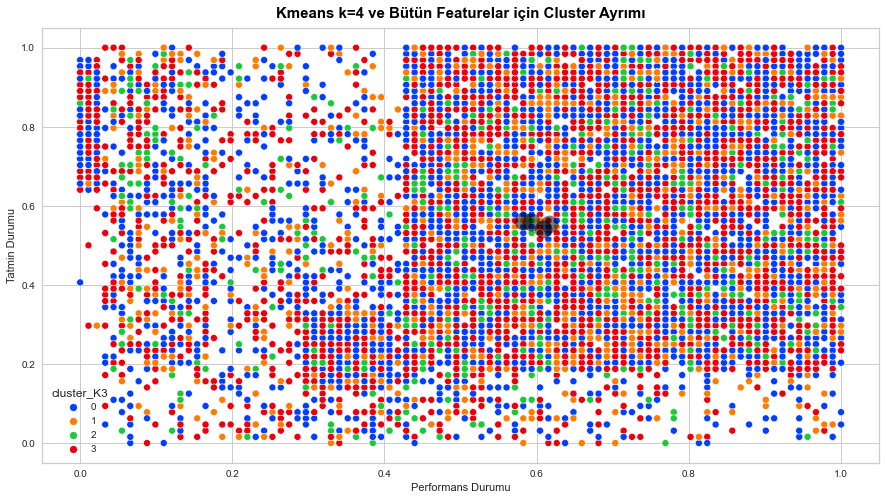

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='minmaxscaler__satisfaction_level', y='minmaxscaler__last_evaluation', hue='cluster_K3', data=X_scaled, palette="bright")
centers = KMeans_model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=300, alpha=0.5)
plt.title('Kmeans k=4 ve Bütün Featurelar için Cluster Ayrımı', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Tatmin Durumu')
plt.xlabel('Performans Durumu');

In [ ]:
X_scaled["left"] = df["left"]

In [ ]:
X_scaled.groupby("cluster_K3")["left"].value_counts()

cluster_K3  left
0           0       3734
            1       1117
1           0       1589
            1        105
2           0        942
            1         48
3           0       3735
            1        721
Name: left, dtype: int64

In [ ]:
ct = pd.crosstab(X_scaled["cluster_K3"], X_scaled["left"])
ct

left           0     1
cluster_K3            
0           3734  1117
1           1589   105
2            942    48
3           3735   721

In [ ]:
ct.style.background_gradient()

## Feature select

In [ ]:
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  work_accident  promotion_last_5years departments  \
0                   3              0                      0       sales   
1                   6              0                      0       sales   
2                   4              0                      0       sales   
3                   5              0                      0       sales   
4                   3              0                      0       sales   

   salary  left  
0     low     1  
1  medium     1  
2  medium     1  
3     low     1  
4     low     1

In [ ]:
df.groupby("left").mean().T.style.background_gradient(axis=1)

In [ ]:
X = df[["satisfaction_level","average_montly_hours","salary"]]

In [ ]:
cat_columns = X.select_dtypes("object").columns
num_columns = X.select_dtypes("number").columns
cat_columns, num_columns

(Index(['salary'], dtype='object'),
 Index(['satisfaction_level', 'average_montly_hours'], dtype='object'))

In [ ]:
ord_enc = OrdinalEncoder(categories=[["low","medium","high"]])
scaler = MinMaxScaler()

In [ ]:
column_trans = make_column_transformer((ord_enc, cat_columns), (scaler, num_columns),
                                         remainder="passthrough")

In [ ]:
X_scaled = pd.DataFrame( data=column_trans.fit_transform(X),
                         columns=column_trans.get_feature_names_out(), 
                         index=df.index)
X_scaled.sample(7)

ordinalencoder__salary  minmaxscaler__satisfaction_level  \
6143                      1.0                          0.472527   
44                        0.0                          0.000000   
10334                     2.0                          0.494505   
245                       0.0                          0.395604   
2512                      0.0                          0.142857   
1399                      0.0                          0.021978   
9013                      0.0                          0.285714   

       minmaxscaler__average_montly_hours  
6143                             0.696262  
44                               0.841121  
10334                            0.415888  
245                              0.275701  
2512                             0.509346  
1399                             0.948598  
9013                             0.836449

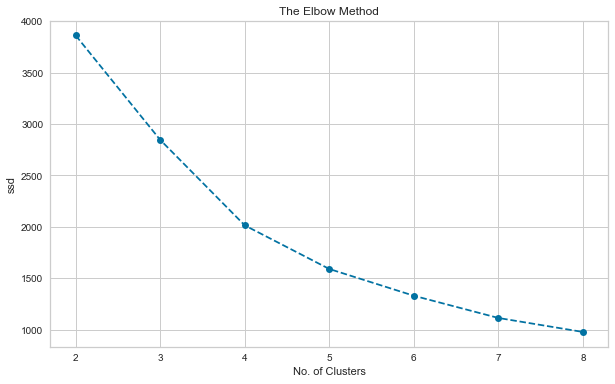

In [ ]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,9):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 9), ssd, "bo--")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [ ]:
pd.Series(ssd).diff()

0            NaN
1   -1014.716823
2    -830.339739
3    -423.642409
4    -260.004392
5    -215.862049
6    -136.024219
dtype: float64

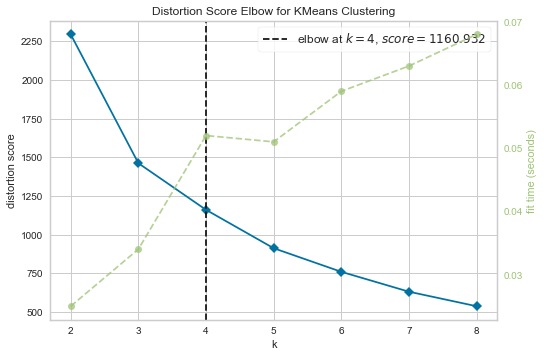

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,9))
visu.fit(X_scaled)
visu.poof();

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5802417013691825
For n_clusters=3, the silhouette score is 0.6078673065871016
For n_clusters=4, the silhouette score is 0.5010003023289933
For n_clusters=5, the silhouette score is 0.4016898330450915
For n_clusters=6, the silhouette score is 0.4151112289971627
For n_clusters=7, the silhouette score is 0.4241022034612161
For n_clusters=8, the silhouette score is 0.42912133318622653


In [ ]:
KMeans_model = KMeans(n_clusters = 4, random_state=42)

In [ ]:
KMeans_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
X_scaled["cluster_K3"] = KMeans_model.labels_

In [ ]:
X_scaled.head()

ordinalencoder__salary  minmaxscaler__satisfaction_level  \
0                     0.0                          0.318681   
1                     1.0                          0.780220   
2                     1.0                          0.021978   
3                     0.0                          0.692308   
4                     0.0                          0.307692   

   minmaxscaler__average_montly_hours  cluster_K3  
0                            0.285047           0  
1                            0.775701           1  
2                            0.822430           1  
3                            0.593458           3  
4                            0.294393           0

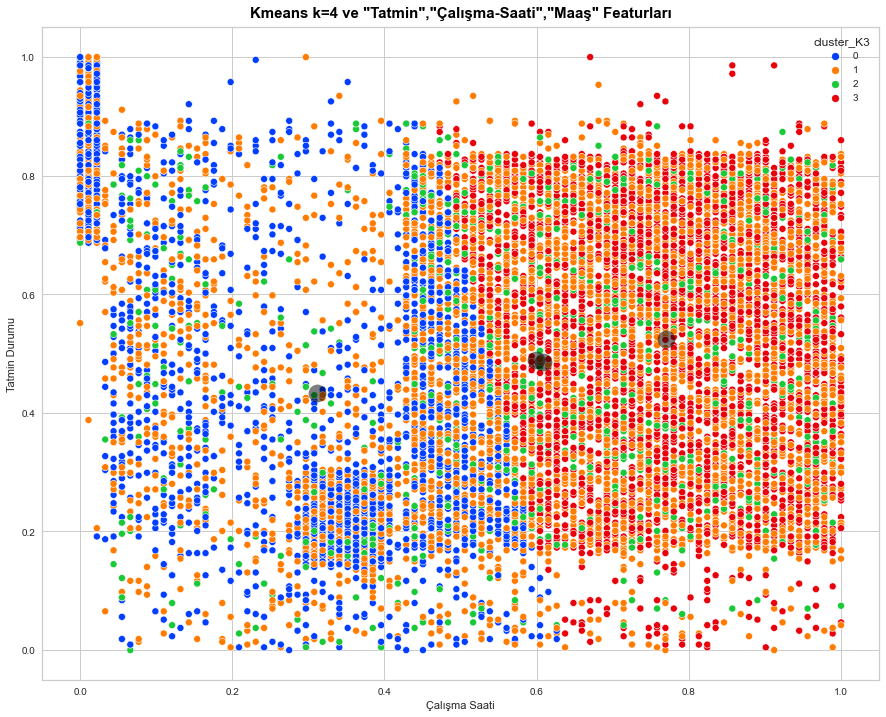

In [ ]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='minmaxscaler__satisfaction_level', y='minmaxscaler__average_montly_hours', hue='cluster_K3', data=X_scaled, palette="bright")
centers = KMeans_model.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=300, alpha=0.5)
plt.title('Kmeans k=4 ve "Tatmin","Çalışma-Saati","Maaş" Featurları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Tatmin Durumu')
plt.xlabel('Çalışma Saati');

In [ ]:
X_scaled["left"] = df["left"]

In [ ]:
X_scaled.groupby("cluster_K3")["left"].value_counts()

cluster_K3  left
0           0       1462
            1        847
1           0       4492
            1        769
2           0        942
            1         48
3           0       3104
            1        327
Name: left, dtype: int64

In [ ]:
ct = pd.crosstab(X_scaled["cluster_K3"], X_scaled["left"])
ct

left           0    1
cluster_K3           
0           1462  847
1           4492  769
2            942   48
3           3104  327

In [ ]:
adjusted_rand_score(X_scaled["left"], X_scaled["cluster_K3"])


-0.031235584007116166

## Cluster-2

In [ ]:
X = df[["satisfaction_level","average_montly_hours"]]

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_scaled = pd.DataFrame(data=scaler.fit_transform(X), columns=scaler.get_feature_names_out(), index=X.index)
X_scaled.sample(5)

satisfaction_level  average_montly_hours
4677            0.538462              0.733645
1564            0.032967              0.186916
8693            0.835165              0.691589
8204            0.747253              0.448598
383             0.318681              0.294393

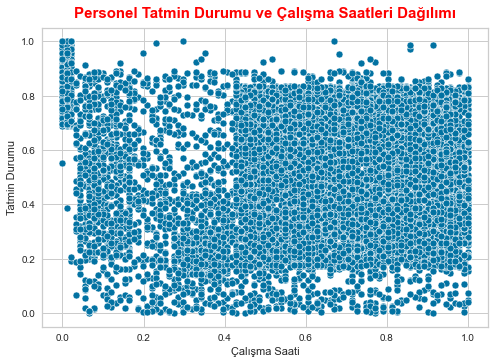

In [ ]:
sns.scatterplot(data= X_scaled, x="satisfaction_level", y="average_montly_hours")
plt.title('Personel Tatmin Durumu ve Çalışma Saatleri Dağılımı', fontsize=15, fontweight='bold', color="red", pad=10)
plt.ylabel('Tatmin Durumu')
plt.xlabel('Çalışma Saati');

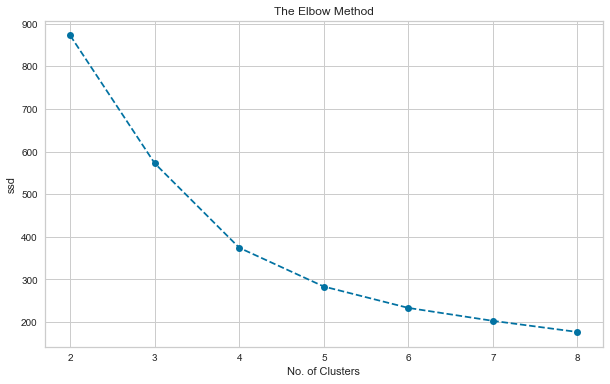

In [ ]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,9):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 9), ssd, "bo--")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('ssd')
plt.show()

In [ ]:
pd.Series(ssd).diff()

0           NaN
1   -299.972518
2   -198.001472
3    -90.869229
4    -50.143925
5    -30.358884
6    -26.077570
dtype: float64

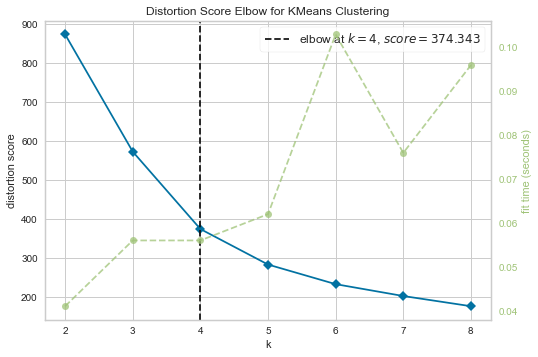

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,9))
visu.fit(X_scaled)
visu.poof();

In [ ]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.37972035399145904
For n_clusters=3, the silhouette score is 0.4022144749631172
For n_clusters=4, the silhouette score is 0.42290237930065594
For n_clusters=5, the silhouette score is 0.42069776483883425
For n_clusters=6, the silhouette score is 0.3963118389409467
For n_clusters=7, the silhouette score is 0.39696336206876054
For n_clusters=8, the silhouette score is 0.3990307572173664


In [ ]:
KMeans_model = KMeans(n_clusters = 4, random_state=42)

# scorelara göre 3 cluster'a karar verdiğimiz için n_clusters = 4.

In [ ]:
KMeans_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [ ]:
X_scaled["cluster_K3"] = KMeans_model.labels_


In [ ]:
X_scaled.head()

satisfaction_level  average_montly_hours  cluster_K3
0            0.318681              0.285047           1
1            0.780220              0.775701           2
2            0.021978              0.822430           3
3            0.692308              0.593458           2
4            0.307692              0.294393           1

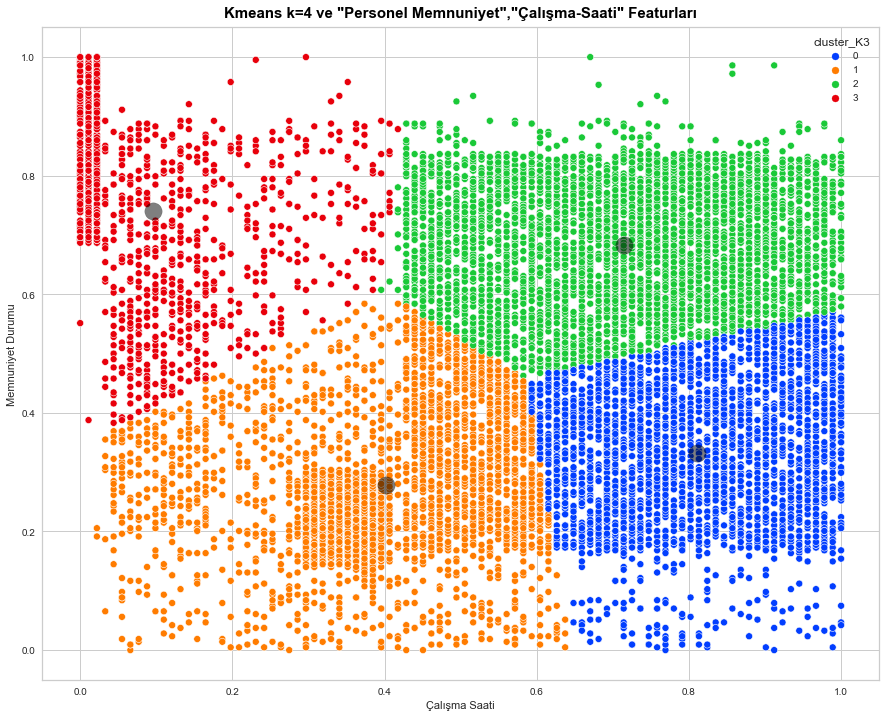

In [ ]:
plt.figure(figsize=(15,12))
sns.scatterplot(x='satisfaction_level', y='average_montly_hours', hue='cluster_K3', data=X_scaled, palette="bright")
centers = KMeans_model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)
plt.title('Kmeans k=4 ve "Personel Memnuniyet","Çalışma-Saati" Featurları', fontsize=15, fontweight='bold', color="black", pad=10)
plt.ylabel('Memnuniyet Durumu')
plt.xlabel('Çalışma Saati');

In [ ]:
X_scaled["left"] = df["left"]

In [ ]:
X_scaled.groupby("cluster_K3")["left"].value_counts()

cluster_K3  left
0           0       3072
            1         31
1           0       2378
            1        884
2           0       3908
            1        534
3           0        642
            1        542
Name: left, dtype: int64

In [ ]:
ct = pd.crosstab(X_scaled["cluster_K3"], X_scaled["left"])
ct

left           0    1
cluster_K3           
0           3072   31
1           2378  884
2           3908  534
3            642  542

In [ ]:
adjusted_rand_score(X_scaled["left"], X_scaled["cluster_K3"])


0.051452664421407

## 5. Model Building

### Split Data as Train and Test Set

In [138]:
df = pd.read_csv("HR_Dataset.csv")

df.columns = df.columns.str.lower().str.strip()
left = df["left"]
df.drop("left", axis=1,inplace=True)
df["left"] = left
df.drop_duplicates(inplace=True)

In [139]:
df.sample(7)

satisfaction_level  last_evaluation  number_project  \
6785                0.64             0.94               3   
7196                0.51             0.83               3   
7440                0.69             0.64               4   
5751                0.35             0.81               5   
2640                0.69             0.56               4   
5485                0.38             0.59               4   
2788                0.16             0.97               6   

      average_montly_hours  time_spend_company  work_accident  \
6785                   148                   2              0   
7196                   133                   3              0   
7440                   190                   4              0   
5751                   182                   5              0   
2640                   178                   3              0   
5485                   276                   2              0   
2788                   235                   3              0   

      promotion_last_5years  departments  salary  left  
6785                      0  product_mng  medium     0  
7196                      0        sales     low     0  
7440                      0    technical  medium     0  
5751                      0        sales    high     0  
2640                      0      support  medium     0  
5485                      0  product_mng     low     0  
2788                      0    technical     low     0

In [140]:
X = df.drop("left",axis=1)
y = df["left"] 

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [142]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (9592, 9)
Train target shape   :  (9592,)
Test features shape  :  (2399, 9)
Test target shape    :  (2399,)


# KNN Model

In [144]:
X_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

In [145]:
cat_columns = X_train.select_dtypes("object").columns
num_columns = X_train.select_dtypes("number").columns

In [146]:
ord_enc = OrdinalEncoder(categories=[['low', 'medium', 'high']])
one_enc = OneHotEncoder()
scaler = MinMaxScaler()
column_trans = make_column_transformer((ord_enc, ["salary"] ),(one_enc, ["departments"]), (scaler, num_columns ))

#### Model Building

In [147]:
model_KNN = KNeighborsClassifier()

operations = [("Scaler_Encoder", column_trans), ("KNN", model_KNN)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['departments']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years'],
      dtype='object'))])),
                ('KNN', KNeighborsClassifier())])

#### Prediction

In [148]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

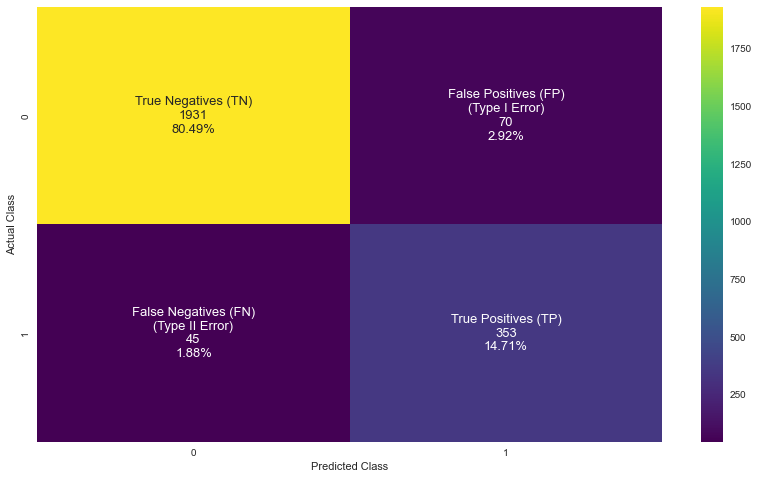

In [149]:
plt.figure(figsize=(14,8))

y_pred = pipe_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

In [150]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[1931   70]
 [  45  353]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.83      0.89      0.86       398

    accuracy                           0.95      2399
   macro avg       0.91      0.93      0.92      2399
weighted avg       0.95      0.95      0.95      2399


Train_Set
[[7804  195]
 [ 193 1400]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.88      0.88      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



With Ordinal Encoder

In [151]:
ord_enc = OrdinalEncoder(categories= [['low', 'medium', 'high'],X_train["departments"].unique()])
scaler = MinMaxScaler()
column_trans = make_column_transformer((ord_enc, ["salary", "departments"] ), remainder='passthrough')

In [152]:
model_KNN = KNeighborsClassifier()

operations = [("Ord_Encoder", column_trans),
              ("Scaler", scaler),
              ("KNN", model_KNN)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Ord_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             array(['technical', 'IT', 'support', 'management', 'sales', 'product_mng',
       'marketing', 'accounting', 'RandD', 'hr'], dtype=object)]),
                                                  ['salary', 'departments'])])),
                ('Scaler', MinMaxScaler()), ('KNN', KNeighborsClassifier())])

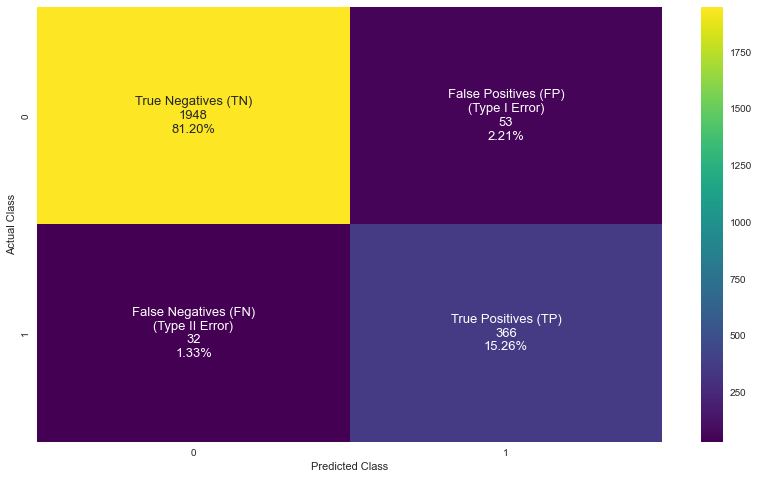

In [155]:
plt.figure(figsize=(14,8))

y_pred = pipe_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

In [156]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[1948   53]
 [  32  366]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.87      0.92      0.90       398

    accuracy                           0.96      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.96      0.96      2399


Train_Set
[[7840  159]
 [ 151 1442]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.90      0.91      0.90      1593

    accuracy                           0.97      9592
   macro avg       0.94      0.94      0.94      9592
weighted avg       0.97      0.97      0.97      9592



*CROSS VALIDATION*

In [ ]:
model_KNN = KNeighborsClassifier()

operations = [("Ord_Encoder", column_trans), ("Scaler", scaler), ("KNN", model_KNN)]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, X_train, y_train, 
                        scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                        cv=10, return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy      0.957777
train_accuracy     0.966743
test_precision     0.860228
train_precision    0.896426
test_recall        0.891372
train_recall       0.904234
test_f1            0.875178
train_f1           0.900310
test_roc_auc       0.953245
train_roc_auc      0.993644
dtype: float64

*Elbow Method for Choosing Best K Values*

In [ ]:
model_KNN = KNeighborsClassifier()

operations = [("Ord_Encoder", column_trans), ("Scaler", scaler), ("KNN", model_KNN)]

pipe_model = Pipeline(steps=operations)

test_error_rates = []

for k in range(1,30):
    
    pipe_model.set_params(KNN__n_neighbors=k)
    pipe_model.fit(X_train,y_train) 
   
    y_pred_test = pipe_model.predict(X_test)
    
    test_error = 1 - recall_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [ ]:
model_KNN = KNeighborsClassifier()

operations = [("Ord_Encoder", column_trans), ("Scaler", scaler), ("KNN", model_KNN)]

pipe_model = Pipeline(steps=operations)

test_error_rates = []
train_error_rates = []

for k in range(1,30):
    
    pipe_model.set_params(KNN__n_neighbors=k)
    pipe_model.fit(X_train,y_train) 
   
    y_pred_test = pipe_model.predict(X_test)
    test_error = 1 - recall_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

    y_pred_train = pipe_model.predict(X_train)
    train_error = 1 - recall_score(y_train, y_pred_train)
    train_error_rates.append(train_error)

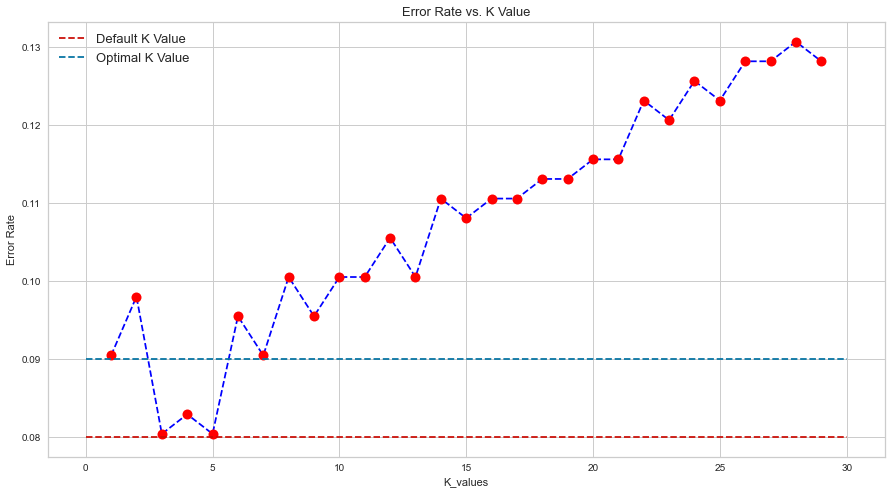

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', size=13)
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.08, xmin = 0, xmax = 30, colors= 'r', linestyles='--', label='Default K Value')
plt.hlines(y=0.09, xmin = 0, xmax = 30, colors= 'b', linestyles='--', label='Optimal K Value')
plt.legend(prop={'size':13});

*MODELING WITH OPTIMAL K VALUE*


In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=3)

operations = [("Ord_Encoder", column_trans), ("Scaler", scaler), ("KNN", model_KNN)]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Ord_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             array(['technical', 'IT', 'support', 'management', 'sales', 'product_mng',
       'marketing', 'accounting', 'RandD', 'hr'], dtype=object)]),
                                                  ['salary', 'departments'])])),
                ('Scaler', MinMaxScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[1951   50]
 [  32  366]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.88      0.92      0.90       398

    accuracy                           0.97      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7868  131]
 [ 137 1456]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.92      0.91      0.92      1593

    accuracy                           0.97      9592
   macro avg       0.95      0.95      0.95      9592
weighted avg       0.97      0.97      0.97      9592



*GRID SEARCH*

In [ ]:

model_KNN = KNeighborsClassifier()

operations = [("Ord_Encoder", column_trans), ("Scaler", scaler), ("KNN", model_KNN)]

pipe_model = Pipeline(steps=operations)

param_grid = {'KNN__n_neighbors': range(1,10),
              'KNN__p': [1,2],
              'KNN__weights': ['uniform', 'distance'],
              'KNN__leaf_size': [15, 30, 40]}

knn_grid_model = GridSearchCV(pipe_model, param_grid, cv=10, verbose=1, scoring='recall', n_jobs=-1)

%time knn_grid_model.fit(X_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Wall time: 33.1 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Ord_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high'],
                                                                                                    array(['technical', 'IT', 'support', 'management', 'sales', 'product_mng',
       'marketing', 'accounting', 'RandD', 'hr'], dtype=object)]),
                                                                         ['salary',
                                                                          'departments'])])),
                                       ('Scaler', MinMaxScaler()),
                                       ('KNN', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNN__leaf_size': [15, 30, 40],
                         'KNN__n_neighbors': range(1, 10), 'KNN__p': [1, 2],
                         'KNN__weights': ['uniform', 'distance']},
             scoring='recall', verbose=1)

In [ ]:
print('Best Params :', knn_grid_model.best_params_)

Best Params : {'KNN__leaf_size': 15, 'KNN__n_neighbors': 5, 'KNN__p': 1, 'KNN__weights': 'distance'}


In [ ]:
print('Best Score :', knn_grid_model.best_score_)

Best Score : 0.900805817610063


In [ ]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)
# Best Scorelarda overfit oluyor

Test_Set
[[1948   53]
 [  32  366]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.87      0.92      0.90       398

    accuracy                           0.96      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.96      0.96      2399


Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [157]:
model_KNN = KNeighborsClassifier(n_neighbors=3)

operations = [("Ord_Encoder", column_trans), ("Scaler", scaler), ("KNN", model_KNN)]

KNN_model = Pipeline(steps=operations)

KNN_model.fit(X_train, y_train)

Pipeline(steps=[('Ord_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high'],
                                                                             array(['technical', 'IT', 'support', 'management', 'sales', 'product_mng',
       'marketing', 'accounting', 'RandD', 'hr'], dtype=object)]),
                                                  ['salary', 'departments'])])),
                ('Scaler', MinMaxScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=3))])

#### Evaluating Model Performance

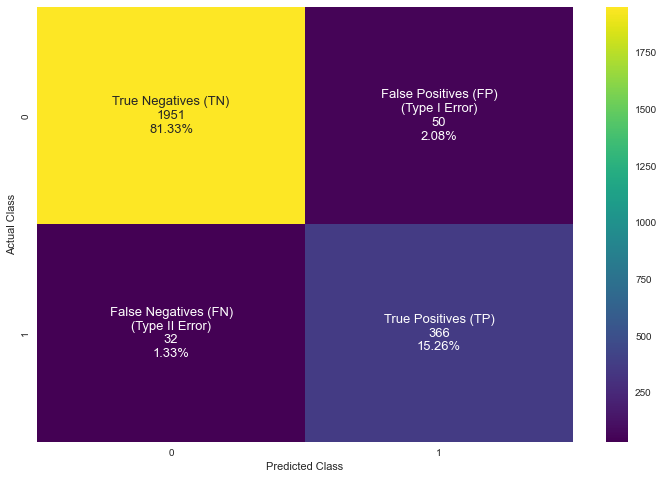

In [158]:
y_pred = KNN_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

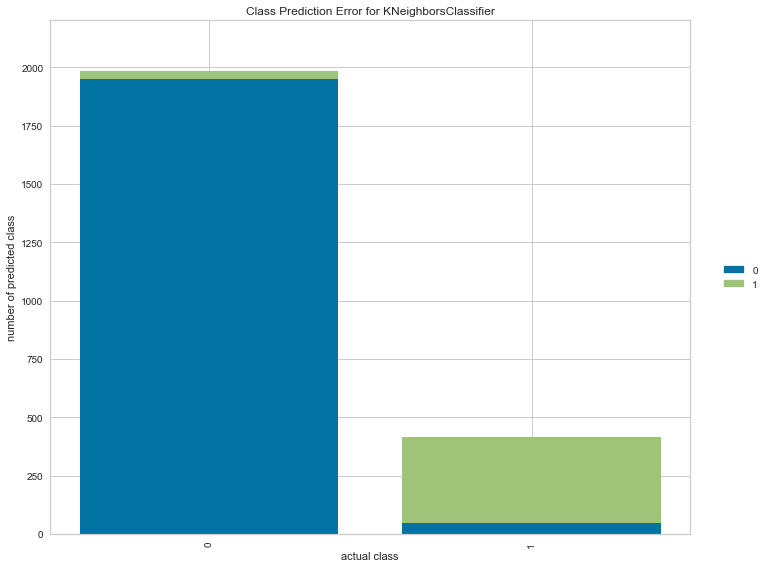

In [159]:
visualizer = ClassPredictionError(KNN_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

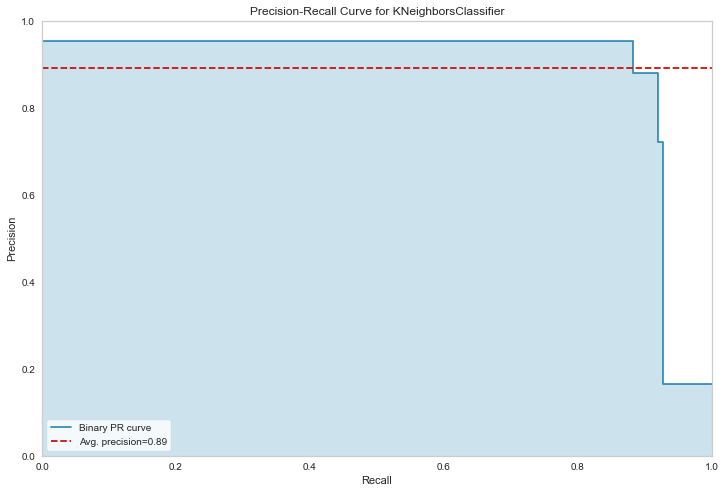

In [160]:
KNN_model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(KNN_model,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [161]:
y_pred_proba = KNN_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.891848548160693

#### Feature Importance

In [ ]:
# Bu modelde uygulayamayız.

#### Scores

In [162]:
y_pred = KNN_model.predict(X_test)
y_pred_proba = KNN_model.predict_proba(X_test)

KNN_accuracy = KNN_model.score(X_test, y_test))
KNN_precision = precision_score(y_test, y_pred)
KNN_recall = recall_score(y_test, y_pred)
KNN_f1 = f1_score(y_test, y_pred)
KNN_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

## Final KNN_Model and Model Deployment

In [172]:
column_trans = make_column_transformer((OrdinalEncoder(), ['departments']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), 
                                        remainder='passthrough')
scaler = MinMaxScaler()

model_KNN = KNeighborsClassifier(n_neighbors=3)

operations = [("Ord_Encoder", column_trans), ("Scaler", scaler), ("KNN", model_KNN)]

final_model_KNN = Pipeline(steps=operations)

final_model_KNN.fit(X, y)

Pipeline(steps=[('Ord_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('Scaler', MinMaxScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=3))])

In [173]:
pickle.dump(final_model_KNN, open("KNN_model.pkl", 'wb'))

# Random Forest Classifier

In [174]:
df = pd.read_csv("HR_Dataset.csv")

df.columns = df.columns.str.lower().str.strip()
left = df["left"]
df.drop("left", axis=1,inplace=True)
df["left"] = left
df.drop_duplicates(inplace=True)

In [175]:
df.sample(3)

satisfaction_level  last_evaluation  number_project  \
7454                0.49             0.57               4   
5510                0.55             0.85               4   
927                 0.46             0.86               2   

      average_montly_hours  time_spend_company  work_accident  \
7454                   141                   3              0   
5510                   273                   2              0   
927                    212                   4              0   

      promotion_last_5years departments  salary  left  
7454                      0     support  medium     0  
5510                      0       sales  medium     0  
927                       0       sales  medium     1

In [176]:
X = df.drop("left",axis=1)
y = df["left"] 

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [178]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (9592, 9)
Train target shape   :  (9592,)
Test features shape  :  (2399, 9)
Test target shape    :  (2399,)


#### Model Building

In [179]:
column_trans = make_column_transformer((OrdinalEncoder(), ['departments']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), 
                                        remainder='passthrough')

In [180]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=42))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('RF_model', RandomForestClassifier(random_state=42))])

## Model Performance on Classification Tasks

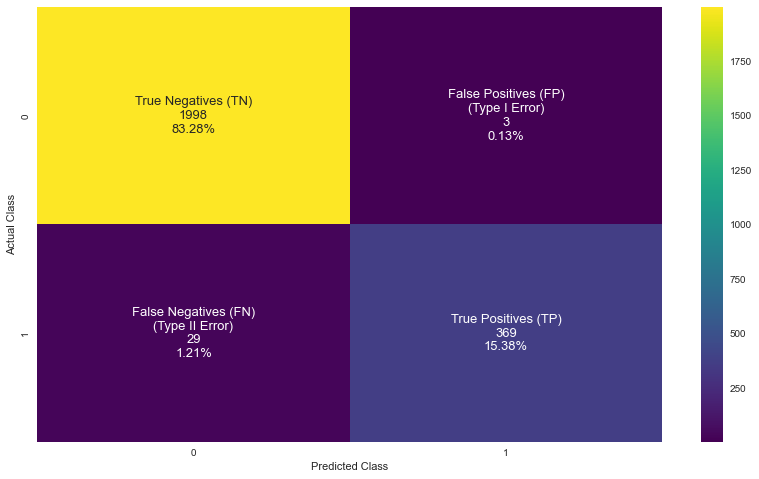

In [181]:
plt.figure(figsize=(14,8))

y_pred = pipe_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

In [182]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[1998    3]
 [  29  369]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.98      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



*CROSS VALIDATION*

In [183]:
operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=42))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", 'precision', 'recall', 'f1', 'roc_auc'], 
                        cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy      0.984674
train_accuracy     1.000000
test_precision     0.989886
train_precision    1.000000
test_recall        0.917134
train_recall       1.000000
test_f1            0.952046
train_f1           1.000000
test_roc_auc       0.980130
train_roc_auc      1.000000
dtype: float64

*GRID SEARCH*


In [ ]:

operations = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(random_state=42))]

model = Pipeline(steps=operations)

param_grid = {'RF_model__n_estimators':[64, 100, 128, 200],
              'RF_model__max_features':[3, 5, 'auto'],
              'RF_model__max_depth':[4, 7, 9],
              'RF_model__min_samples_split':[2, 5, 8],
              'RF_model__class_weight': [None, 'balanced', 'balanced_subsample']}

rf_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='f1', n_jobs=-1)

%time rf_grid_model.fit(X_train,y_train)



Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Wall time: 11min 30s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder-1',
                                                                         OrdinalEncoder(),
                                                                         ['departments']),
                                                                        ('ordinalencoder-2',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']]),
                                                                         ['salary'])])),
                                       ('RF_model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RF_model__class_weight': [None, 'balanced',
                                                    'balanced_subsample'],
                         'RF_model__max_depth': [4, 7, 9],
                         'RF_model__max_features': [3, 5, 'auto'],
                         'RF_model__min_samples_split': [2, 5, 8],
                         'RF_model__n_estimators': [64, 100, 128, 200]},
             scoring='f1', verbose=1)

In [ ]:
rf_grid_model.best_params_

{'RF_model__class_weight': None,
 'RF_model__max_depth': 9,
 'RF_model__max_features': 5,
 'RF_model__min_samples_split': 5,
 'RF_model__n_estimators': 200}

In [ ]:
rf_grid_model.best_score_

0.9528377445550731

In [ ]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1997    4]
 [  29  369]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7984   15]
 [ 118 1475]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.93      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.96      0.97      9592
weighted avg       0.99      0.99      0.99      9592



In [184]:
column_trans = make_column_transformer((OrdinalEncoder(), ['departments']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), 
                                        remainder='passthrough')

RF_model = RandomForestClassifier(max_depth=9, max_features=5,
                                min_samples_split=5, n_estimators=200,
                                random_state=42)
operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('RF_model',
                 RandomForestClassifier(max_depth=9, max_features=5,
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])

## Evaluating ROC Curves and AUC

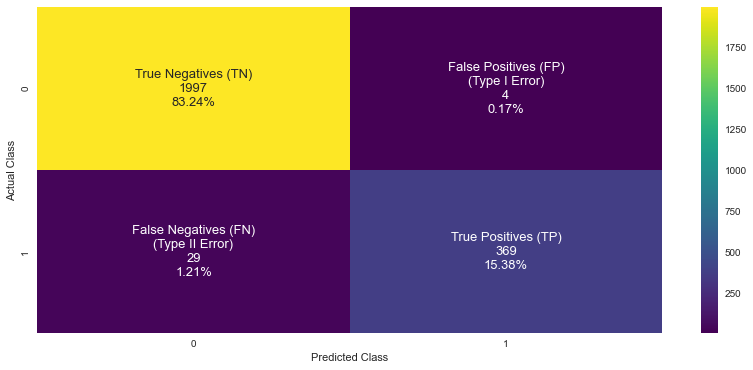

In [185]:
plt.figure(figsize=(14,6))

y_pred = pipe_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

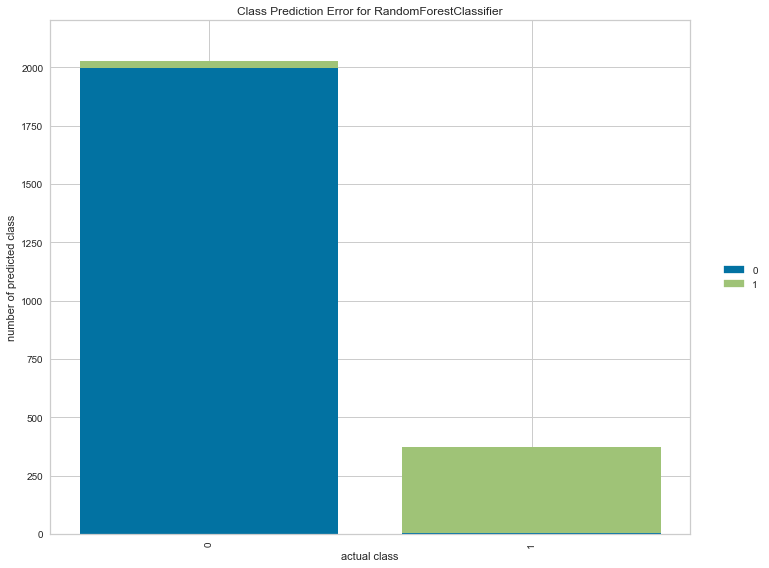

In [186]:
visualizer = ClassPredictionError(pipe_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

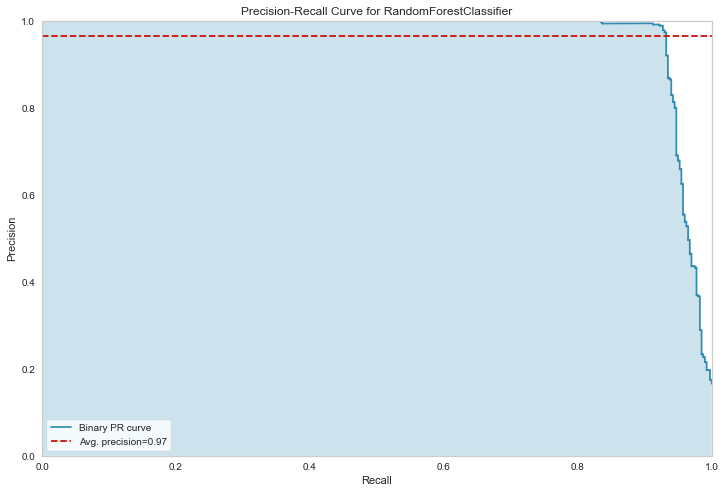

In [187]:
viz = PrecisionRecallCurve(pipe_model,cmap="Set1")

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

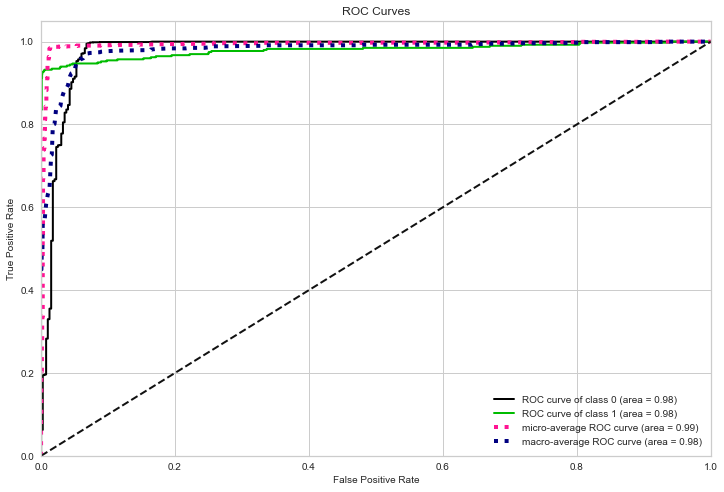

In [188]:
model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [189]:
y_pred_proba = pipe_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9664388314041543

### RF Model Feature Importance

In [ ]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder-1__departments', 'ordinalencoder-2__salary',
       'remainder__satisfaction_level', 'remainder__last_evaluation',
       'remainder__number_project', 'remainder__average_montly_hours',
       'remainder__time_spend_company', 'remainder__work_accident',
       'remainder__promotion_last_5years'], dtype=object)

In [ ]:
new_features = [i.replace("ordinalencoder-1__","").replace("ordinalencoder-2__","")
                .replace("remainder__", "") for i in features]
new_features

['departments',
 'salary',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years']

In [ ]:
rf_feature_imp = pd.DataFrame(data = pipe_model["RF_model"].feature_importances_, index = new_features, #index=X.columns
                              columns = ["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending = False)
rf_feature_imp

Feature Importance
satisfaction_level               0.411442
number_project                   0.181156
time_spend_company               0.157631
last_evaluation                  0.123959
average_montly_hours             0.119471
departments                      0.003517
salary                           0.002136
work_accident                    0.000471
promotion_last_5years            0.000218

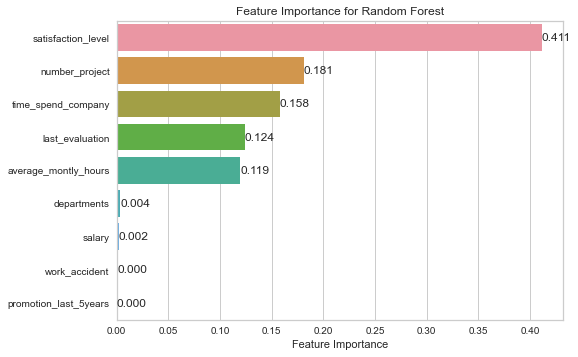

In [ ]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

#### Scores

In [190]:
y_pred = pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)

RF_accuracy = pipe_model.score(X_test, y_test)
RF_precision = precision_score(y_test, y_pred)
RF_recall = recall_score(y_test, y_pred)
RF_f1 = f1_score(y_test, y_pred)
RF_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

### Final Model Random Forest

In [193]:
column_trans = make_column_transformer((OrdinalEncoder(), ['departments']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), 
                                        remainder='passthrough')

RF_model = RandomForestClassifier(max_depth=9, max_features=5,
                                min_samples_split=5, n_estimators=200,
                                random_state=42)
operations = [("OrdinalEncoder", column_trans), ("RF_model", RF_model)]

final_model_RF = Pipeline(steps=operations)
final_model_RF.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('RF_model',
                 RandomForestClassifier(max_depth=9, max_features=5,
                                        min_samples_split=5, n_estimators=200,
                                        random_state=42))])

#### Evaluating Model Performance and Tuning

In [194]:
pickle.dump(final_model_RF, open("RF_model.pkl", 'wb'))

#### Prediction

In [195]:
x = pd.DataFrame({
        'satisfaction_level': 0.5,
        'last_evaluation': 0.7,
        'number_project': 7,
        'average_montly_hours': 200,
        'time_spend_company': 5,
        'work_accident': 0,
        'promotion_last_5years': 0,
        'departments': 'IT',
        'salary': 'low'
    }, index=[0])

In [196]:
x

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.5              0.7               7                   200   

   time_spend_company  work_accident  promotion_last_5years departments salary  
0                   5              0                      0          IT    low

In [197]:
final_model_RF.predict(x)

array([1], dtype=int64)

# XGBoost Classifier

In [198]:
df = pd.read_csv("HR_Dataset.csv")

df.columns = df.columns.str.lower().str.strip()
left = df["left"]
df.drop("left", axis=1,inplace=True)
df["left"] = left
df.drop_duplicates(inplace=True)

In [199]:
df.sample(3)

satisfaction_level  last_evaluation  number_project  \
9296                0.72             0.79               4   
7133                0.67             0.55               4   
8120                0.76             0.85               4   

      average_montly_hours  time_spend_company  work_accident  \
9296                   154                   3              0   
7133                   256                   6              0   
8120                   135                   3              0   

      promotion_last_5years departments  salary  left  
9296                      0          IT  medium     0  
7133                      0          hr     low     0  
8120                      0  accounting  medium     0

In [200]:
X = df.drop("left",axis=1)
y = df["left"] 

#### Model Building

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [202]:
column_trans = make_column_transformer((OrdinalEncoder(), ['departments']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), 
                                        remainder='passthrough')

In [221]:
XGB_model = XGBClassifier(random_state=42)
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGB_model)]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsa...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=42, ...))])

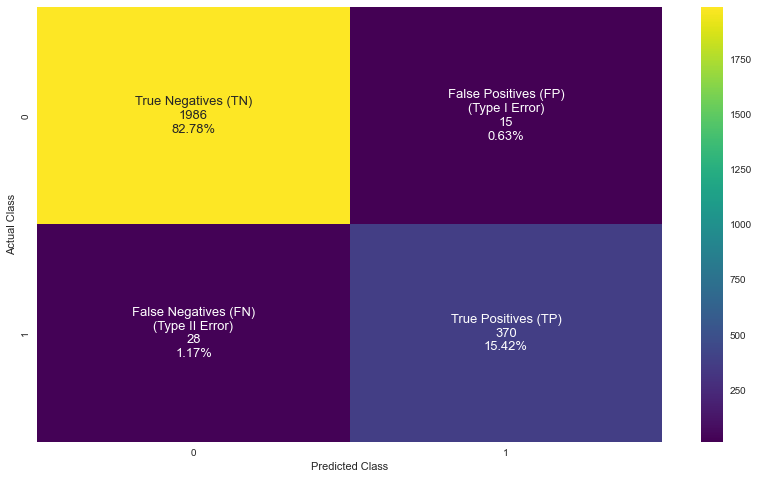

In [222]:
plt.figure(figsize=(14,8))

y_pred = pipe_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

In [223]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[1986   15]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7993    6]
 [  29 1564]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.98      0.99      1593

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592



In [224]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.59957495, 0.59957495, 0.59957495, ..., 0.59957495, 0.59957495,
       3.01067169])

*CROSS VALIDATION*


In [225]:
XGB_model = XGBClassifier(random_state=42)

operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGB_model)]

pipe_model = Pipeline(steps=operations)


scores = cross_validate(pipe_model, X_train, y_train,
                        scoring = ['accuracy', 'precision','recall', 'f1', 'roc_auc'], 
                        cv = 10, return_train_score=True,
                        # fit_params={"XGB_model__sample_weight":classes_weights}
                                                            )
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy      0.982276
train_accuracy     0.997058
test_precision     0.973490
train_precision    0.996334
test_recall        0.918381
train_recall       0.985910
test_f1            0.945026
train_f1           0.991092
test_roc_auc       0.982619
train_roc_auc      0.999943
dtype: float64

*GridsearchCV*

In [215]:
param_grid = {'XGB_model__n_estimators': [5, 20, 40],
              'XGB_model__max_depth': [1, 3, 5, 6],
              'XGB_model__subsample': [0.5, 0.8, 1], 
              'XGB_model__learning_rate': [0.05, 0.08, 0.1],
              'XGB_model__colsample_bytree': [0.7, 0.9, 1]} 

In [216]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=42))]
pipe_model = Pipeline(steps=operations)



xgb_grid_model = GridSearchCV(pipe_model, 
                              param_grid, 
                              scoring="recall",
                              cv=5,
                              n_jobs = -1,
                              return_train_score=True)

In [217]:
xgb_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder-1',
                                                                         OrdinalEncoder(),
                                                                         ['departments']),
                                                                        ('ordinalencoder-2',
                                                                         OrdinalEncoder(categories=[['low',
                                                                                                     'medium',
                                                                                                     'high']]),
                                                                         ['salary'])])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=N...
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.7, 0.9, 1],
                         'XGB_model__learning_rate': [0.05, 0.08, 0.1],
                         'XGB_model__max_depth': [1, 3, 5, 6],
                         'XGB_model__n_estimators': [5, 20, 40],
                         'XGB_model__subsample': [0.5, 0.8, 1]},
             return_train_score=True, scoring='recall')

In [218]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 5,
 'XGB_model__subsample': 1}

In [ ]:
XGBClassifier().get_xgb_params

<bound method XGBModel.get_xgb_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)>

In [219]:
xgb_grid_model.best_score_

0.9165099268547545

In [220]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[1943   58]
 [  31  367]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.86      0.92      0.89       398

    accuracy                           0.96      2399
   macro avg       0.92      0.95      0.93      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7745  254]
 [ 130 1463]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      7999
           1       0.85      0.92      0.88      1593

    accuracy                           0.96      9592
   macro avg       0.92      0.94      0.93      9592
weighted avg       0.96      0.96      0.96      9592



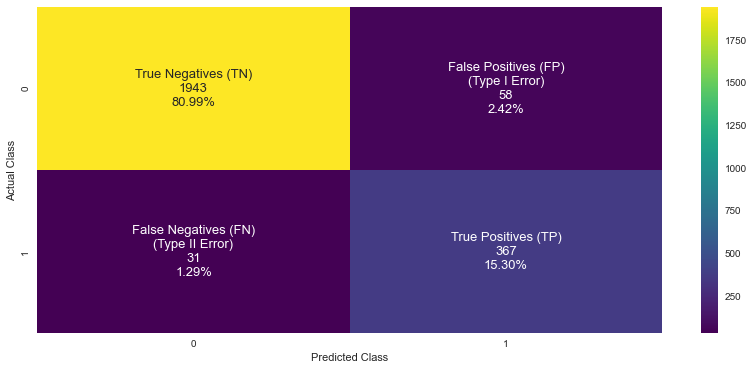

In [226]:
plt.figure(figsize=(14,6))

y_pred = xgb_grid_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

## Evaluating ROC Curves and AUC

In [227]:
column_trans = make_column_transformer((OrdinalEncoder(), ['departments']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), 
                                        remainder='passthrough')

In [228]:
XGB_model = XGBClassifier(random_state=42)
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGB_model)]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsa...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=42, ...))])

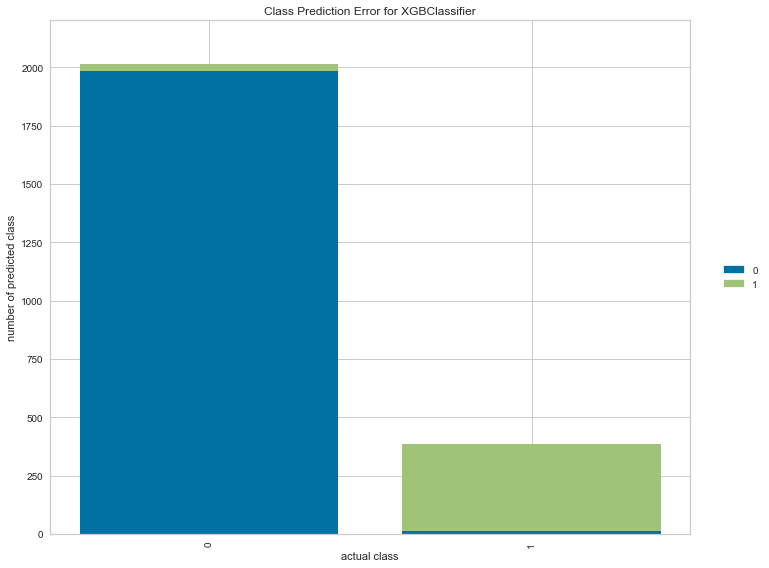

In [229]:
visualizer = ClassPredictionError(pipe_model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

visualizer.poof();

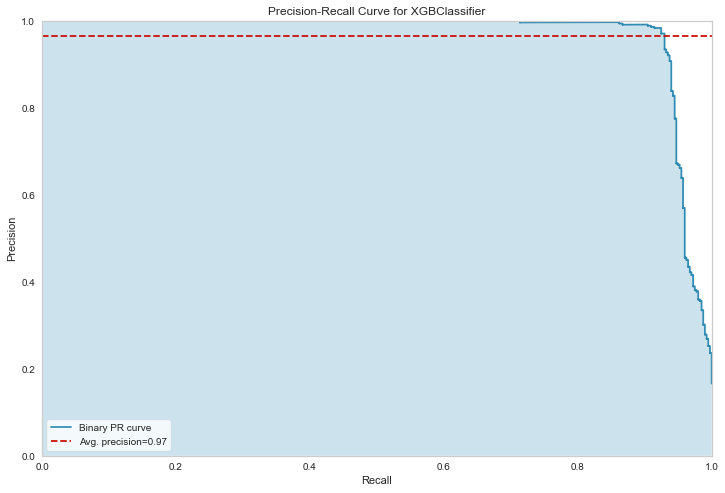

In [230]:
viz = PrecisionRecallCurve(pipe_model,cmap="Set1")

viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

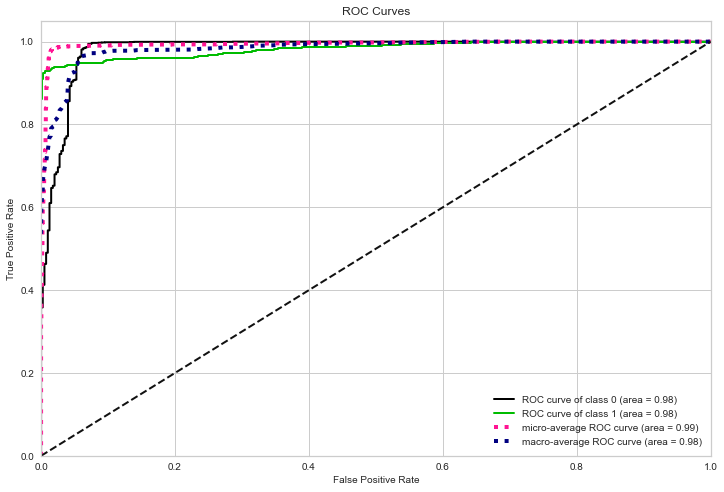

In [231]:
y_pred_proba = pipe_model.predict_proba(X_test)
    
plot_roc(y_test, y_pred_proba)
plt.show();

In [232]:
y_pred_proba = pipe_model.predict_proba(X_test)
average_precision_score(y_test, y_pred_proba[:,1])

0.9662580461684565

### XGB Model Feature Importance

In [233]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder-1__departments', 'ordinalencoder-2__salary',
       'remainder__satisfaction_level', 'remainder__last_evaluation',
       'remainder__number_project', 'remainder__average_montly_hours',
       'remainder__time_spend_company', 'remainder__work_accident',
       'remainder__promotion_last_5years'], dtype=object)

In [234]:
new_features = [i.replace("ordinalencoder-1__","").replace("ordinalencoder-2__","")
                .replace("remainder__", "") for i in features]
new_features

['departments',
 'salary',
 'satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'work_accident',
 'promotion_last_5years']

In [235]:
rf_feature_imp = pd.DataFrame(data = pipe_model["XGB_model"].feature_importances_, index = new_features, #index=X.columns
                              columns = ["Feature Importance"])

rf_feature_imp = rf_feature_imp.sort_values("Feature Importance", ascending = False)
rf_feature_imp

Feature Importance
satisfaction_level               0.278297
time_spend_company               0.223938
number_project                   0.221622
last_evaluation                  0.114742
average_montly_hours             0.054527
work_accident                    0.047241
salary                           0.029811
departments                      0.018029
promotion_last_5years            0.011793

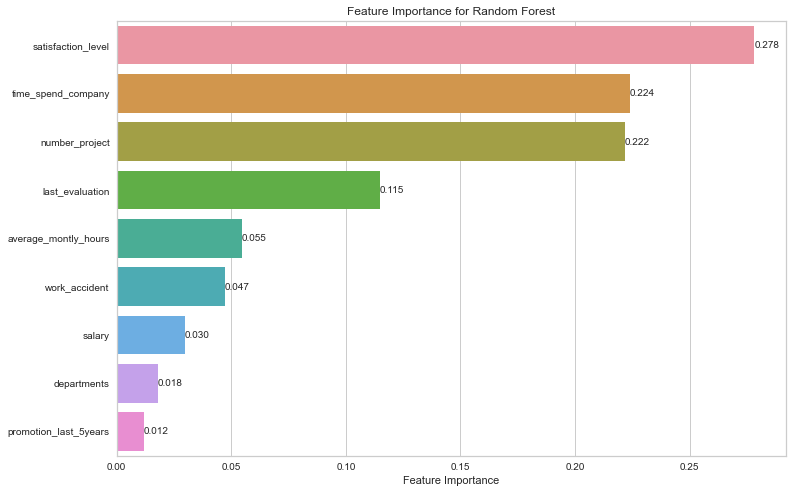

In [236]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.title("Feature Importance for Random Forest")
plt.show()

#### Scores

In [237]:
y_pred = pipe_model.predict(X_test)
y_pred_proba = pipe_model.predict_proba(X_test)

XGB_accuracy = pipe_model.score(X_test, y_test)
XGB_precision = precision_score(y_test, y_pred)
XGB_recall = recall_score(y_test, y_pred)
XGB_f1 = f1_score(y_test, y_pred)
XGB_precision_recall = average_precision_score(y_test, y_pred_proba[:,1])

### Final Model XGB

In [242]:
column_trans = make_column_transformer((OrdinalEncoder(), ['departments']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), 
                                        remainder='passthrough')

In [244]:
column_trans = make_column_transformer((OrdinalEncoder(), ['departments']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), 
                                        remainder='passthrough')

XGB_model = XGBClassifier(random_state=42)
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGB_model)]

final_model_XGB = Pipeline(steps=operations)
final_model_XGB.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder-1',
                                                  OrdinalEncoder(),
                                                  ['departments']),
                                                 ('ordinalencoder-2',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['salary'])])),
                ('XGB_model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsa...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, predictor='auto',
                               random_state=42, ...))])

In [245]:
pickle.dump(final_model_XGB, open("XGB_model.pkl", 'wb'))

#### Evaluating Model Performance and Tuning

#### Prediction

In [246]:
x = pd.DataFrame({
        'satisfaction_level': 0.5,
        'last_evaluation': 0.7,
        'number_project': 7,
        'average_montly_hours': 200,
        'time_spend_company': 7,
        'work_accident': 0,
        'promotion_last_5years': 0,
        'departments': 'IT',
        'salary': 'low'
    }, index=[0])

In [247]:
final_model_XGB.predict(x)

array([0])

# ANN Classifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone/HR_Dataset.csv")

In [12]:
df = pd.read_csv("HR_Dataset.csv")

In [13]:
df.columns = df.columns.str.lower().str.strip()
left = df["left"]
df.drop("left", axis=1,inplace=True)
df["left"] = left
df.drop_duplicates(inplace=True)

In [14]:
df.sample(7)

satisfaction_level  last_evaluation  number_project  \
11340                0.77             0.54               4   
8034                 0.90             0.53               3   
241                  0.37             0.46               2   
8512                 0.55             0.88               3   
1699                 0.43             0.46               2   
4401                 0.60             0.72               4   
5819                 0.70             0.67               3   

       average_montly_hours  time_spend_company  work_accident  \
11340                   139                   3              1   
8034                    270                   3              0   
241                     156                   3              0   
8512                    173                   3              1   
1699                    126                   3              0   
4401                    267                   4              0   
5819                    179                   3              1   

       promotion_last_5years departments  salary  left  
11340                      0          IT     low     0  
8034                       0       sales  medium     0  
241                        0       sales     low     1  
8512                       0   technical     low     0  
1699                       0       sales  medium     1  
4401                       0     support     low     0  
5819                       0       sales  medium     0


#### Layer Architecture Building and Compiling\

In [22]:
X = df.drop(["left"], axis=1)
y = df["left"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [24]:
column_trans = make_column_transformer((OrdinalEncoder(), ['departments']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), 
                                        remainder='passthrough')
scaler = MinMaxScaler()

In [25]:
X_train = column_trans.fit_transform(X_train)
X_val = column_trans.transform(X_val)
X_test = column_trans.transform(X_test)

In [26]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [27]:
X_train.shape

(9172, 9)

### without class_weigth

In [47]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(3, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.001) # optimizer 
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"]) 

In [48]:
early_stop = EarlyStopping(monitor = "val_loss",
                           mode = "min",
                           verbose = 1,
                           patience = 10,
                           restore_best_weights = True)

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 18)                180       
                                                                 
 dense_9 (Dense)             (None, 9)                 171       
                                                                 
 dense_10 (Dense)            (None, 3)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


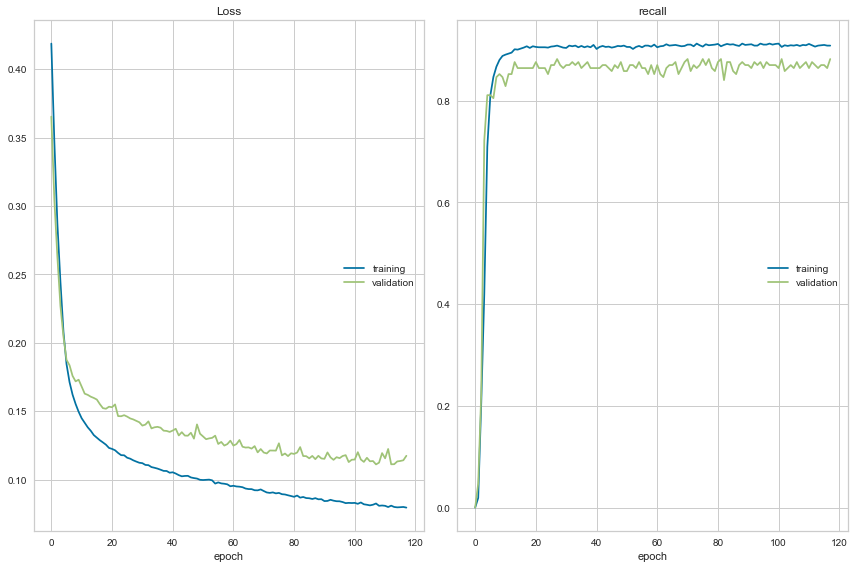

Loss
	training         	 (min:    0.079, max:    0.419, cur:    0.079)
	validation       	 (min:    0.111, max:    0.365, cur:    0.117)
recall
	training         	 (min:    0.000, max:    0.912, cur:    0.908)
	validation       	 (min:    0.000, max:    0.882, cur:    0.882)
287/287 [==============================] - 1s 3ms/step - loss: 0.0795 - recall: 0.9081 - val_loss: 0.1173 - val_recall: 0.8817
Epoch 118: early stopping


In [50]:
model.fit(x = X_train, y = y_train,
        validation_data=(X_val, y_val),
        batch_size = 32, epochs = 200,
        verbose = 1,
        callbacks=[early_stop, PlotLossesKerasTF()])

#### Evaluating Model Performance and Tunning

In [51]:
plt.rcParams["figure.figsize"] = (12,8)

<AxesSubplot:>

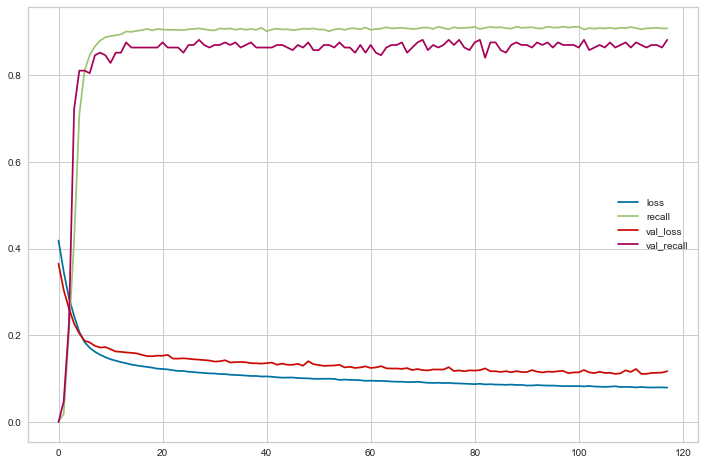

In [52]:
loss_df = pd.DataFrame(model.history.history) 
loss_df.plot()

In [53]:
y_pred = (model.predict(X_test) > .5).astype("int32") 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

57/57 [==============================] - 0s 1ms/step
[[1489   11]
 [  29  270]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1500
           1       0.96      0.90      0.93       299

    accuracy                           0.98      1799
   macro avg       0.97      0.95      0.96      1799
weighted avg       0.98      0.98      0.98      1799



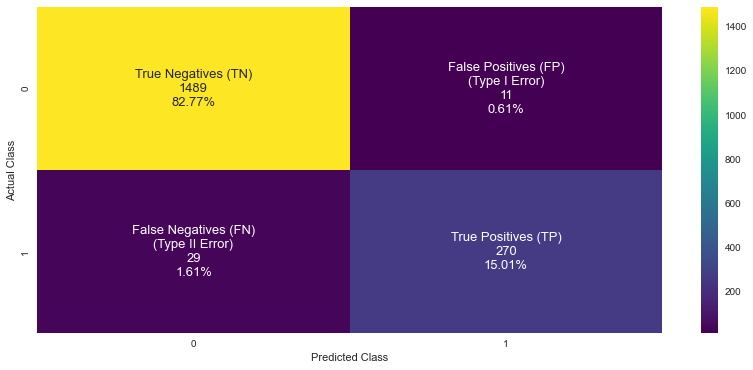

In [54]:
plt.figure(figsize=(14,6))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

57/57 [==============================] - 0s 1ms/step


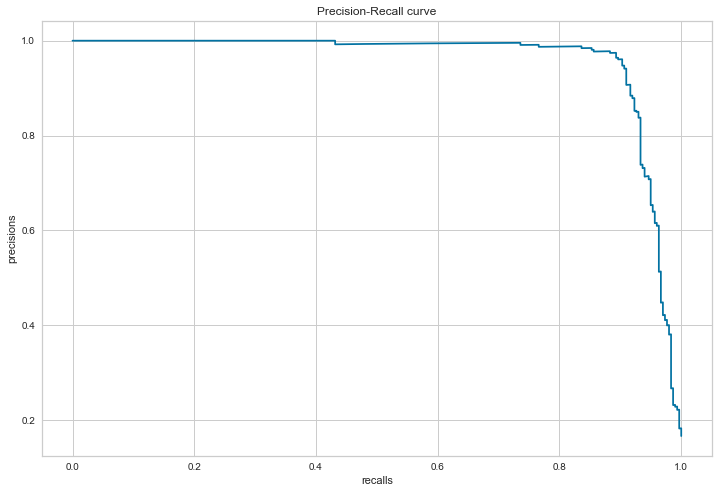

In [55]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [56]:
non_weighted_pre_score = average_precision_score(y_test, y_pred_proba)
non_weighted_pre_score

0.9582104859805315

In [57]:
non_weighted_f1 = f1_score(y_test, y_pred)
non_weighted_recall = recall_score(y_test, y_pred)

### with class_weigth

In [58]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(3, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.001) # optimizer 
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"]) 

In [59]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5995554974506472, 1: 3.011162179908076}

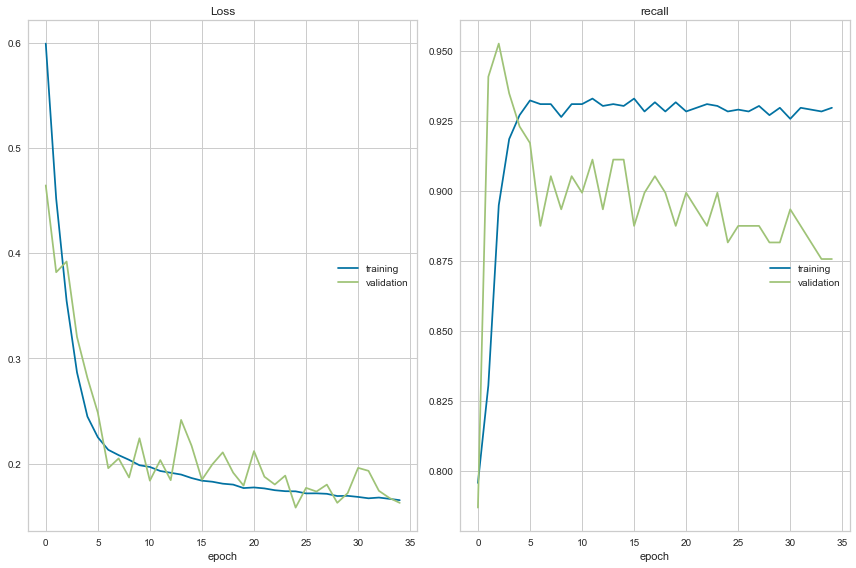

Loss
	training         	 (min:    0.165, max:    0.599, cur:    0.165)
	validation       	 (min:    0.158, max:    0.464, cur:    0.163)
recall
	training         	 (min:    0.796, max:    0.933, cur:    0.930)
	validation       	 (min:    0.787, max:    0.953, cur:    0.876)
287/287 [==============================] - 1s 3ms/step - loss: 0.1654 - recall: 0.9297 - val_loss: 0.1628 - val_recall: 0.8757
Epoch 35: early stopping


In [60]:
model.fit(x = X_train, y = y_train,
        validation_data=(X_val, y_val),
        batch_size = 32, epochs = 200,
        verbose = 1,
        callbacks=[early_stop, PlotLossesKerasTF()],
        class_weight=class_weights)

<AxesSubplot:>

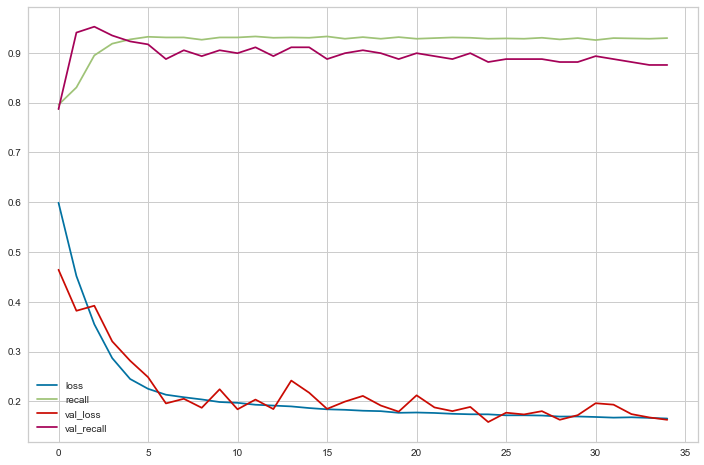

In [61]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [62]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

57/57 [==============================] - 0s 2ms/step
[[1448   52]
 [  26  273]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1500
           1       0.84      0.91      0.87       299

    accuracy                           0.96      1799
   macro avg       0.91      0.94      0.92      1799
weighted avg       0.96      0.96      0.96      1799



### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for model

57/57 [==============================] - 0s 2ms/step


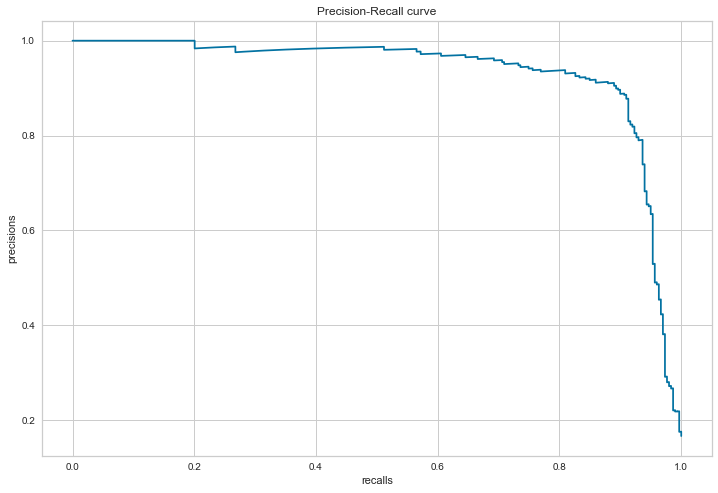

In [64]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [65]:
weighted_pre_score = average_precision_score(y_test, y_pred_proba)
weighted_pre_score  

0.9333039155131774

In [66]:
weighted_f1 = f1_score(y_test, y_pred)
weighted_recall = recall_score(y_test, y_pred)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.2160661816596985
accuracy :  0.9700000286102295


## Optuna (Hyperparameter optimization tool)

In [67]:
import optuna
# optimizers for gradient descent to use in backpropagation
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam  

In [68]:
trial_metric = "Recall"
batch_size = 128


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int('n_units1', 8, 128)
    n_units2 = trial.suggest_int('n_units2', 8, 128)
    n_units3 = trial.suggest_int('n_units3', 8, 128)
    optimizer = trial.suggest_categorical("optimizer",
                                          [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(n_units2, activation='relu'))
    model.add(Dense(n_units3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer(learning_rate=learning_rate),
                  metrics=[trial_metric])
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(X_train,
              y_train,
              validation_data=(X_val, y_val),
              batch_size=batch_size,
              epochs=100,
              callbacks=[early_stop],
              class_weight={0: w0, 1: w1},
              verbose=0)
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    if score > .90 : # after this threshold model gets terrible scores for class 0
        score = score * 0
    return score

In [69]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-03-03 15:30:59,797] A new study created in memory with name: no-name-cc02bd24-20c8-4b9a-b4e4-3471b291ad1d
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adam.Adam'> which is of type type.
  warnings.warn(message)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\optuna\distributions.py:535: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float 

Restoring model weights from the end of the best epoch: 46.
Epoch 56: early stopping


[I 2023-03-03 15:31:23,272] Trial 1 finished with value: 0.0 and parameters: {'n_units1': 127, 'n_units2': 122, 'n_units3': 69, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0007285495157175587, 'w0': 1.1353426820023238, 'w1': 2.1050756565595377}. Best is trial 0 with value: 0.0.
[I 2023-03-03 15:31:37,505] Trial 2 finished with value: 0.3913043439388275 and parameters: {'n_units1': 50, 'n_units2': 81, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 3.268936885131061e-05, 'w0': 0.016269530666282648, 'w1': 0.054559166306504425}. Best is trial 2 with value: 0.3913043439388275.


Restoring model weights from the end of the best epoch: 31.
Epoch 41: early stopping


[I 2023-03-03 15:31:44,282] Trial 3 finished with value: 0.8862876296043396 and parameters: {'n_units1': 80, 'n_units2': 49, 'n_units3': 96, 'optimizer': <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>, 'learning_rate': 0.0003533075133142774, 'w0': 0.35667520289658844, 'w1': 0.06766143163408316}. Best is trial 3 with value: 0.8862876296043396.


Restoring model weights from the end of the best epoch: 6.
Epoch 16: early stopping


[I 2023-03-03 15:31:47,570] Trial 4 finished with value: 0.0 and parameters: {'n_units1': 36, 'n_units2': 24, 'n_units3': 124, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.04020958952609462, 'w0': 0.20576548384540566, 'w1': 0.03174822578771835}. Best is trial 3 with value: 0.8862876296043396.


Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping


[I 2023-03-03 15:31:50,649] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 83, 'n_units2': 17, 'n_units3': 31, 'optimizer': <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>, 'learning_rate': 0.00020259145489046236, 'w0': 0.2374616999527154, 'w1': 0.01949147421394075}. Best is trial 3 with value: 0.8862876296043396.


Restoring model weights from the end of the best epoch: 24.
Epoch 34: early stopping


[I 2023-03-03 15:31:56,874] Trial 6 finished with value: 0.8762542009353638 and parameters: {'n_units1': 59, 'n_units2': 53, 'n_units3': 121, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.0009319328578055465, 'w0': 2.6161907581162542, 'w1': 0.1038469389190084}. Best is trial 3 with value: 0.8862876296043396.


Restoring model weights from the end of the best epoch: 42.
Epoch 52: early stopping


[I 2023-03-03 15:32:03,827] Trial 7 finished with value: 0.0 and parameters: {'n_units1': 27, 'n_units2': 124, 'n_units3': 27, 'optimizer': <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>, 'learning_rate': 0.0038861758566193193, 'w0': 0.3364255696649165, 'w1': 0.011664388361762517}. Best is trial 3 with value: 0.8862876296043396.


Restoring model weights from the end of the best epoch: 2.
Epoch 12: early stopping


[I 2023-03-03 15:32:06,164] Trial 8 finished with value: 0.0 and parameters: {'n_units1': 88, 'n_units2': 51, 'n_units3': 61, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.005766867719068507, 'w0': 0.18898507947252394, 'w1': 3.0631166130958873}. Best is trial 3 with value: 0.8862876296043396.


Restoring model weights from the end of the best epoch: 34.
Epoch 44: early stopping


[I 2023-03-03 15:32:12,901] Trial 9 finished with value: 0.8896321058273315 and parameters: {'n_units1': 68, 'n_units2': 16, 'n_units3': 95, 'optimizer': <class 'keras.optimizers.optimizer_v2.adam.Adam'>, 'learning_rate': 0.07432311240988124, 'w0': 0.9533944296265988, 'w1': 2.6412927749503026}. Best is trial 9 with value: 0.8896321058273315.


{'n_units1': 68,
 'n_units2': 16,
 'n_units3': 95,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam,
 'learning_rate': 0.07432311240988124,
 'w0': 0.9533944296265988,
 'w1': 2.6412927749503026}

In [71]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, w0, w1 = (study.best_params['n_units1'],
                               study.best_params['n_units2'],
                               study.best_params['n_units3'],
                               study.best_params['optimizer'],
                               study.best_params['learning_rate'], 
                               study.best_params['w0'],
                               study.best_params['w1'] )
tf.random.set_seed(42)
model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(unit3, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(lr=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(X_train,
          y_train,
          validation_split=.1,
          batch_size=128,
          epochs=100,
          callbacks=[early_stop],
          class_weight={0: w0, 1: w1},
          verbose=1)

Epoch 1/100


c:\Users\mhsna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


65/65 [==============================] - 2s 8ms/step - loss: 0.5814 - recall: 0.5622 - val_loss: 0.2542 - val_recall: 0.6351
Epoch 2/100
65/65 [==============================] - 0s 3ms/step - loss: 0.2959 - recall: 0.8698 - val_loss: 0.1381 - val_recall: 0.8649
Epoch 3/100
65/65 [==============================] - 0s 3ms/step - loss: 0.2385 - recall: 0.9018 - val_loss: 0.1282 - val_recall: 0.9392
Epoch 4/100
65/65 [==============================] - 0s 3ms/step - loss: 0.2552 - recall: 0.8909 - val_loss: 0.1378 - val_recall: 0.8784
Epoch 5/100
65/65 [==============================] - 0s 4ms/step - loss: 0.2268 - recall: 0.8989 - val_loss: 0.1418 - val_recall: 0.8581
Epoch 6/100
65/65 [==============================] - 0s 3ms/step - loss: 0.2101 - recall: 0.9047 - val_loss: 0.1311 - val_recall: 0.8176
Epoch 7/100
65/65 [==============================] - 0s 4ms/step - loss: 0.2206 - recall: 0.9018 - val_loss: 0.1227 - val_recall: 0.9324
Epoch 8/100
65/65 [==============================] - 

In [72]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

57/57 [==============================] - 0s 2ms/step
[[1480   20]
 [  27  272]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1500
           1       0.93      0.91      0.92       299

    accuracy                           0.97      1799
   macro avg       0.96      0.95      0.95      1799
weighted avg       0.97      0.97      0.97      1799



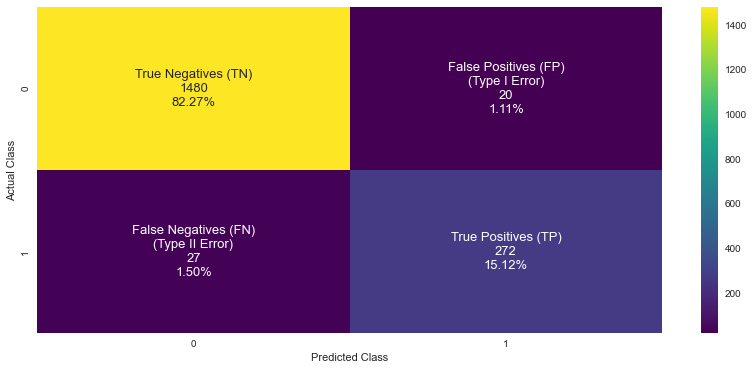

In [73]:
plt.figure(figsize=(14,6))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negatives (TN)', 'False Positives (FP)\n(Type I Error)', 
               'False Negatives (FN)\n(Type II Error)', 'True Positives (TP)']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", annot_kws={'size': 13}, cmap='viridis')
ax.set(xlabel='Predicted Class', ylabel = 'Actual Class');

### ROC (Receiver Operating Curve) and AUC (Area Under Curve) for grid_model

57/57 [==============================] - 0s 2ms/step


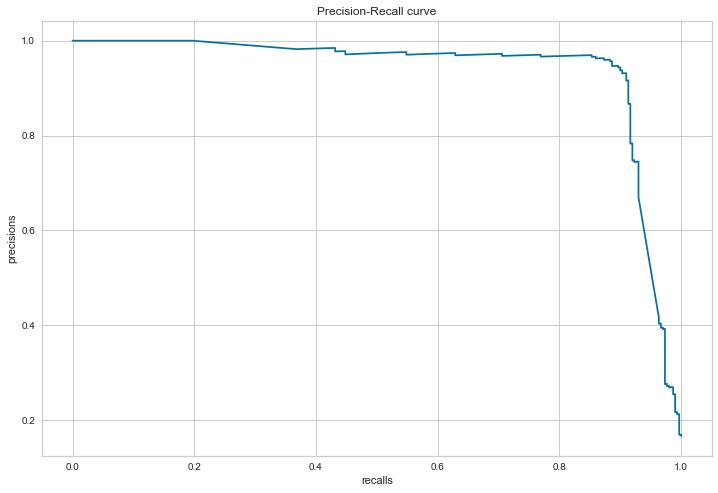

In [74]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [75]:
optuna_pre_score = average_precision_score(y_test, y_pred_proba)
optuna_pre_score  

0.9313377552396657

In [76]:
optuna_weighted_f1 = f1_score(y_test, y_pred)
optuna_weighted_recall = recall_score(y_test, y_pred)

## ANN_Model Comparission

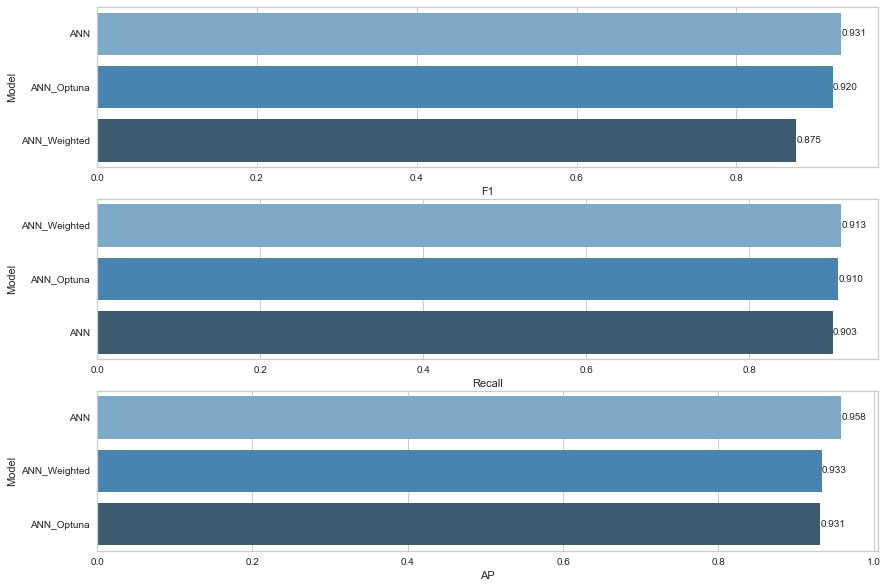

In [77]:
compare = pd.DataFrame({
    "Model": ["ANN", "ANN_Weighted", "ANN_Optuna"],
    "F1": [non_weighted_f1, weighted_f1, optuna_weighted_f1],
    "Recall": [non_weighted_recall, weighted_recall, optuna_weighted_recall],
    "AP": [non_weighted_pre_score, weighted_pre_score, optuna_pre_score]
})


def labels(ax):
    for p in ax.patches:
        width = p.get_width()  # get bar length
        ax.text(
            width,  # set the text at 1 unit right of the bar
            p.get_y() +
            p.get_height() / 2,  # get Y coordinate + X coordinate / 2
            '{:1.3f}'.format(width),  # set variable to display, 2 decimals
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
# Ann_Weighted Seçtik(Recall(1))

## Final Model and Model Deployment

In [98]:
X = df.drop('left', axis=1)
y = df['left'].values

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.15,
                                                    random_state=42)

In [250]:
column_trans = make_column_transformer((OrdinalEncoder(), ['departments']),
                                        (OrdinalEncoder(categories=[['low', 'medium', 'high']]), ['salary']), 
                                        remainder='passthrough')
scaler = MinMaxScaler()

In [101]:
column_trans.fit(X_train)
pickle.dump(column_trans, open("ANN_enc_trans.pkl", "wb"))

In [102]:
scaler.fit(column_trans.fit_transform(X_train))
pickle.dump(scaler, open("ANN_scaler.pkl", 'wb'))

In [251]:
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [252]:
tf.random.set_seed(42)

model = Sequential()

model.add(Dense(18, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(9, activation = "relu"))
model.add(Dense(3, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=0.001) # optimizer 
model.compile(optimizer=opt, 
              loss="binary_crossentropy",
              metrics=["Recall"]) 

In [253]:
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)

class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.5995749468683585, 1: 3.01067168863779}

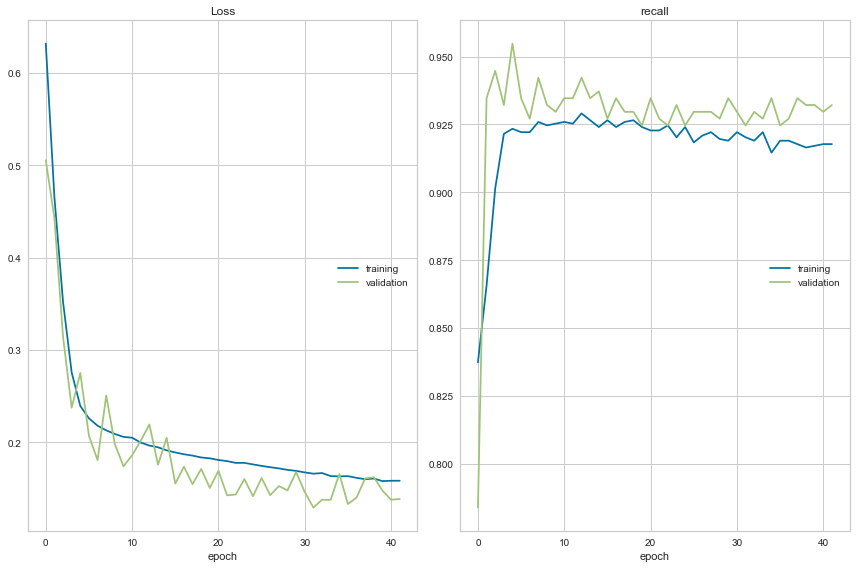

Loss
	training         	 (min:    0.158, max:    0.632, cur:    0.158)
	validation       	 (min:    0.129, max:    0.506, cur:    0.139)
recall
	training         	 (min:    0.837, max:    0.929, cur:    0.918)
	validation       	 (min:    0.784, max:    0.955, cur:    0.932)
300/300 [==============================] - 1s 3ms/step - loss: 0.1584 - recall: 0.9178 - val_loss: 0.1386 - val_recall: 0.9322
Epoch 42: early stopping


In [254]:
model.fit(x = X_train, y = y_train,
        validation_data=(X_test, y_test),
        batch_size = 32, epochs = 200,
        verbose = 1,
        callbacks=[early_stop, PlotLossesKerasTF()],
        class_weight=class_weights)

<AxesSubplot:>

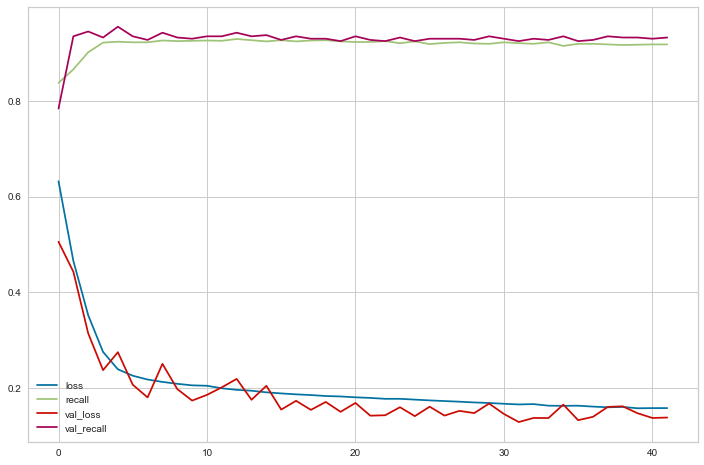

In [255]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [256]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

75/75 [==============================] - 0s 2ms/step
[[1949   52]
 [  30  368]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.88      0.92      0.90       398

    accuracy                           0.97      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.97      0.97      2399



#### Scores

In [260]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

y_pred_proba = model.predict(X_test)

ANN_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]
ANN_precision = precision_score(y_test, y_pred)
ANN_recall = recall_score(y_test, y_pred)
ANN_f1 = f1_score(y_test, y_pred)
ANN_precision_recall = average_precision_score(y_test, y_pred_proba)

75/75 [==============================] - 0s 2ms/step


In [261]:
model.save('ANN_model.h5')

## Loading Model and Scaler

In [93]:
from tensorflow.keras.models import load_model

In [130]:
model_ANN = load_model('ANN_model.h5')
enc_ANN = pickle.load(open("ANN_enc_trans.pkl", "rb"))
scaler_ANN = pickle.load(open("ANN_scaler.pkl", "rb"))

## Prediction

In [131]:
x = pd.DataFrame({
        'satisfaction_level': 0.5,
        'last_evaluation': 0.7,
        'number_project': 5,
        'average_montly_hours': 200,
        'time_spend_company': 3,
        'work_accident': 0,
        'promotion_last_5years': 0,
        'departments': 'IT',
        'salary': 'low'
    }, index=[0])

In [133]:
x.T

0
satisfaction_level     0.5
last_evaluation        0.7
number_project           5
average_montly_hours   200
time_spend_company       3
work_accident            0
promotion_last_5years    0
departments             IT
salary                 low

In [134]:
x = enc_ANN.transform(x)
x = scaler_ANN.transform(x)

In [135]:
(model_ANN.predict(x) > 0.5).astype("int32")

1/1 [==============================] - 0s 79ms/step


array([[0]])

In [136]:
model_ANN.predict(x)

1/1 [==============================] - 0s 45ms/step


array([[0.10928454]], dtype=float32)

# Model Compare

In [265]:
compare = pd.DataFrame({
            'Model': ['XG Boosting', 'KNN',  'Random Forest', 'ANN'],
            'accuracy': [XGB_accuracy, KNN_accuracy, RF_accuracy,  ANN_accuracy],
            'precision': [XGB_precision, KNN_precision, RF_precision, ANN_precision],
            'recall': [XGB_recall, KNN_recall, RF_recall, ANN_recall],
            'f1': [XGB_f1, KNN_f1, RF_f1, ANN_f1],
            'precision_recall': [XGB_precision_recall, KNN_precision_recall, RF_precision_recall, ANN_precision_recall]
})

In [266]:
compare

Model  accuracy  precision    recall        f1  precision_recall
0    XG Boosting  0.982076   0.961039  0.929648  0.945083          0.966258
1            KNN  0.965819   0.879808  0.919598  0.899263          0.891849
2  Random Forest  0.986244   0.989276  0.927136  0.957198          0.966439
3            ANN  0.924623   0.876190  0.924623  0.899756          0.927218

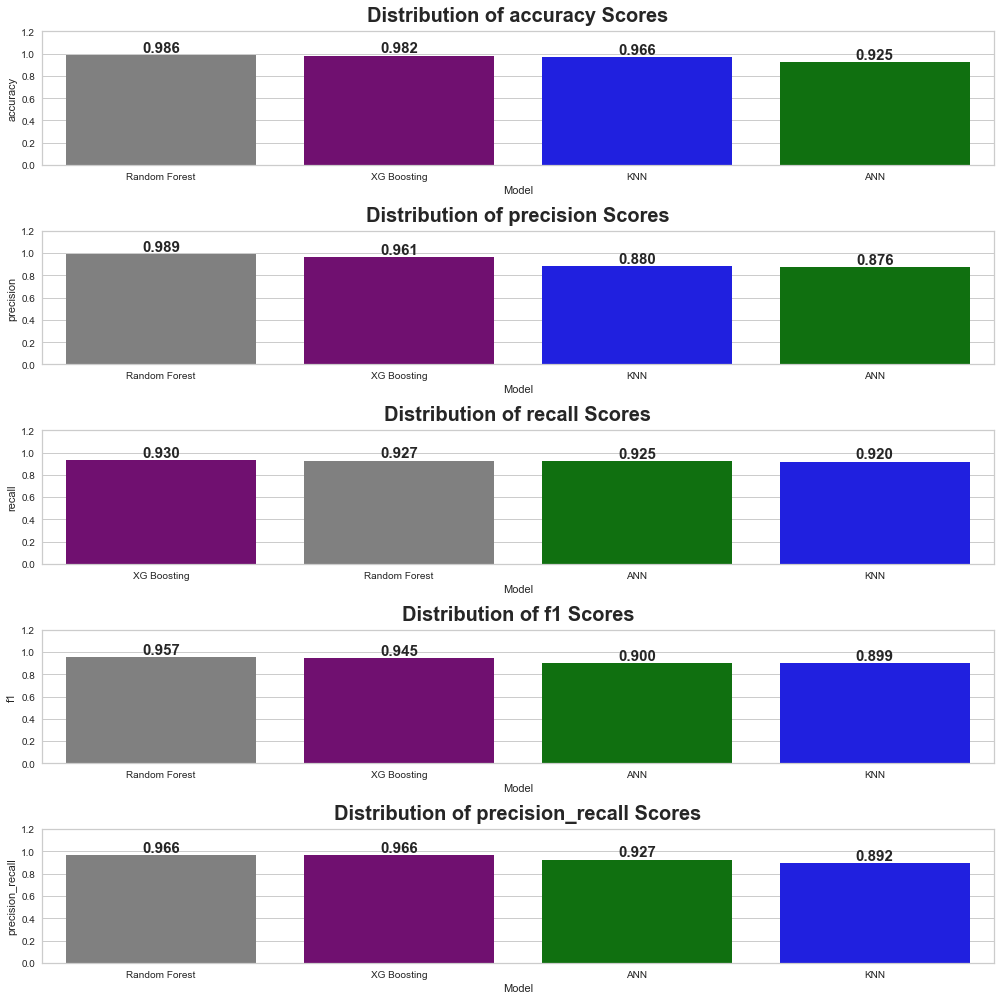

In [269]:
plt.figure(figsize=(14,14))

index = 0
colors={'XG Boosting': 'purple', 'Random Forest': 'gray',
         'KNN': 'blue', 'ANN':'green'}

for col in compare.iloc[:, 1:].columns:    
    index += 1
    plt.subplot(5,1,index)
    a = sns.barplot(data=compare.sort_values(col, ascending=False), x='Model', y=col, palette=colors)
    a.bar_label(a.containers[0], fmt='%.3f', fontsize=15, fontweight='bold'), plt.ylim(0, 1.2)
    plt.title(f'Distribution of {col} Scores', fontsize=20, fontweight='bold', pad=10)
plt.tight_layout()

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

In [270]:
sample = pd.DataFrame({
        'satisfaction_level': 0.38,
        'last_evaluation': 0.53,
        'number_project': 2,
        'average_montly_hours': 157,
        'time_spend_company': 3,
        'work_accident': 0,
        'promotion_last_5years': 0,
        'departments': 'sales',
        'salary': 'low'
}, index=[0])

sample

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   

   time_spend_company  work_accident  promotion_last_5years departments salary  
0                   3              0                      0       sales    low

In [271]:
from tensorflow.keras.models import load_model

In [281]:
encoder = pickle.load(open("ANN_enc_trans.pkl", "rb"))
scaler = pickle.load(open("ANN_scaler.pkl", "rb"))

In [273]:
RF_model = pickle.load(open("RF_model.pkl", "rb"))
XGB_model = pickle.load(open("XGB_model.pkl", "rb"))
KNN_model = pickle.load(open("KNN_model.pkl", "rb"))
ANN_model = load_model("ANN_model.h5")

In [277]:
RF_model.predict(x)

array([1], dtype=int64)

In [278]:
XGB_model.predict(x)

array([0])

In [279]:
KNN_model.predict(x)

array([0], dtype=int64)

In [288]:
x_scaler = scaler.transform(encoder.transform(x))

In [290]:
ANN_model.predict(x_scaler > .5).astype("int32")

1/1 [==============================] - 0s 28ms/step


array([[0]])

### Save and Export the Model

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___